**Natural Language Processing in Python using Regular Expression, Natural Language Toolkit and Classification Models**

This program has as objective to construct a Bag of Words Model a branch of Natural Language Processing to make sentiment analysis.

**Problem Description**

The problem consists in take care about a set of reviews, transforming the words into a sparse matrix and than, create a classification model capable to say with a review is a negative or positive sentiment. 

**Dataset Description**

The dataset is composed by many reviews of quality and service of a restaurant. The structure of the dataset is two columns (the review and the sentiment) and 1001 rows, each row is a review from a client. The sentiment analysis is classified as 0 to negative sentiment and 1 to positive sentiment.

# Data preprocessing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re # Regular Expression
import nltk # Natural Language Toolkit

## Importing Dataset

Here, we consider the delimiter '\t 'to read a tabular separate and quoting = 3 to suppress all quotes (it can interfere in the model).

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

## Cleaning the Text
An important step in Natural Language Processing is to clean your text. It means, we must to select the relevant words to take account in our model. For example, words like I, you, Me, this, that, a, an and others words are not relevant to the model. For this reason, we utilize Natural Language Toolkit, this modulus provides a list with the most non-relevant words. From the stop-word list, we can eliminate these words and keep just the relevant words.

An other important process is to stemmer the words. We consider the root of the words, for example, words as loved, lovely will be stemmed to love. One apply it to reduce our sparse matrix. So, for the text cleaning we utilize some modulus as NLTK and RE.

In [3]:
nltk.download('stopwords')

from nltk.corpus import stopwords # Calling Stopwords class to creat the list with non relevant words
from nltk.stem.porter import PorterStemmer # The class to stemmer the words

corpus = [] # Empty list. We are going to add the cleaned text into this list

all_stopwords = stopwords.words('english') # List that contains all stopwords (non relevant words)
do_not_stop= ['not', 'didn', 'hasn', 'doesn', 'don', 'hadn', 'haven', 'isn', 'wasn', 'aren', 'couldn', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'weren', 'won',  'wouldn']
# do_not_stop is a list with some words which must be considered due to your negative aspect

# Loop to remove the words inside do_not_stop
for keeps in do_not_stop:
    all_stopwords.remove(keeps)
    

ps = PorterStemmer() # Object ot stemmer the words  
# This loop for to clean the text row by row
for i in range(0, 1000):
  # Now we creat a new variable called review, we transform the original text, first we elimate all pontuations and then all capital letters
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) # This eliminates all potuation the first [] refers to the column and the second [] to the rows
    review = review.lower() # To transform capital letter into lowercase
    review = review.split() # We need to split the elements to create a list with many elements, in the past step we had just a list with one single element
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)] # Here eliminate the stopwords from review and then, we stemmer each word
    review = ' '.join(review) # We join all the words to remake the review
    corpus.append(review) # Here we create the final list that contians the cleaned text and from this list we are going to construct our bag of words model.    

[nltk_data] Downloading package stopwords to /home/igor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Creating the Bag of Words Model

This model assigns to each word one column, these columns are the independent variables to build the model. For example, if a review contains the word love two times, for this review the column for love word will contain this appearance frequency, 2.  Once time that we have the sparse matrix, we are able to train our model of sentiment analysis.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer # This class transform words into columns and takes account the appearence frequency.
cv = CountVectorizer(max_features=1500) # This object converts words into columns (max_feature is the number of desired word (number of columns of the sparse matrix))
X = cv.fit_transform(corpus).toarray() # Here we create our sparse matrix and we transform words into numbers (Tokenization)
y = dataset.iloc[:, -1].values # Here we create our dependent variable from the dataset

# Building the classification models

## Splitting Dataset into training and test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##  Training the models

The response to know a new review come from a classification model. Here, we have six different models of classification to train the dataset.

In [6]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)

# K Nearest Nieghbors

from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors= 5, metric='minkowski', p = 2)
classifier2.fit(X_train, y_train)

# Kernel Support Vector Machine

from sklearn.svm import SVC
classifier3 = SVC(kernel='rbf', random_state=0)
classifier3.fit(X_train, y_train)

# Naïves Bayes Classification

from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(X_train, y_train)

# Decision Tree Classification

from sklearn.tree import DecisionTreeClassifier
classifier5 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier5.fit(X_train, y_train)

# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
classifier6 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
classifier6.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

### Predicting the test result

In [7]:
y_pred1 = classifier1.predict(X_test)
y_pred2 = classifier2.predict(X_test)
y_pred3 = classifier3.predict(X_test)
y_pred4 = classifier4.predict(X_test)
y_pred5 = classifier5.predict(X_test)
y_pred6 = classifier6.predict(X_test)

## Selection Model

To select the best classification model, we consider some metrics as precision, recall, f1-score and accuracy. To verify with more precision, to each model we employ the cross validation. After the cross validation, we are going to choose the three best models to tune.

### Metrics results without cross validation


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)
cm4 = confusion_matrix(y_test, y_pred4)
cm5 = confusion_matrix(y_test, y_pred5)
cm6 = confusion_matrix(y_test, y_pred6)

print('Checking Confusion Matrix to a single observation')
print('Logistic Regression Classification')
print(cm1)
print(classification_report(y_test,y_pred1))
print('\n')
print('K Nearest Neighbors')
print(cm2)
print(classification_report(y_test,y_pred2))
print('\n')
print('Support Vector Machine')
print(cm3)
print(classification_report(y_test,y_pred3))
print('\n')
print('Naive Bayes Classification')
print(cm4)
print(classification_report(y_test,y_pred4))
print('\n')
print('Decision Tree Classification')
print(cm5)
print(classification_report(y_test,y_pred5))
print('\n')
print('Random Forest Classification')
print(cm6)
print(classification_report(y_test,y_pred6))
print('\n')

Checking Confusion Matrix to a single observation
Logistic Regression Classification
[[80 17]
 [23 80]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        97
           1       0.82      0.78      0.80       103

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



K Nearest Neighbors
[[67 30]
 [37 66]]
              precision    recall  f1-score   support

           0       0.64      0.69      0.67        97
           1       0.69      0.64      0.66       103

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.66       200
weighted avg       0.67      0.67      0.66       200



Support Vector Machine
[[88  9]
 [33 70]]
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        97
           1       0.89      0.68      0.77     

### Metrics results with cross validation

In [9]:
scoring = ['accuracy', 'precision', 'recall', 'f1'] # List of scores
from sklearn.model_selection import cross_validate
accuracies1 = cross_validate(estimator = classifier1, X = X_train, y = y_train, cv = 10, scoring = scoring)
accuracies2 = cross_validate(estimator = classifier2, X = X_train, y = y_train, cv = 10, scoring = scoring)
accuracies3 = cross_validate(estimator = classifier3, X = X_train, y = y_train, cv = 10, scoring = scoring)
accuracies4 = cross_validate(estimator = classifier4, X = X_train, y = y_train, cv = 10, scoring = scoring)
accuracies5 = cross_validate(estimator = classifier5, X = X_train, y = y_train, cv = 10, scoring = scoring)
accuracies6 = cross_validate(estimator = classifier6, X = X_train, y = y_train, cv = 10, scoring = scoring)


print('Checking K-Fold Cross Validation')
print('\n')
print('Logistic Regression Classification')
print("Accuracy: {:.2f} %".format(accuracies1['test_accuracy'].mean()*100))
print("Precision: {:.2f} %".format(accuracies1['test_precision'].mean()*100))
print("Recall: {:.2f} %".format(accuracies1['test_recall'].mean()*100))
print("F1-score: {:.2f} %".format(accuracies1['test_f1'].mean()*100))
print('\n')
print('K-Nearest Neighbors')
print("Accuracy: {:.2f} %".format(accuracies2['test_accuracy'].mean()*100))
print("Precision: {:.2f} %".format(accuracies2['test_precision'].mean()*100))
print("Recall: {:.2f} %".format(accuracies2['test_recall'].mean()*100))
print("F1-score: {:.2f} %".format(accuracies2['test_f1'].mean()*100))
print('\n')
print('Support Vector Machine')
print("Accuracy: {:.2f} %".format(accuracies3['test_accuracy'].mean()*100))
print("Precision: {:.2f} %".format(accuracies3['test_precision'].mean()*100))
print("Recall: {:.2f} %".format(accuracies3['test_recall'].mean()*100))
print("F1-score: {:.2f} %".format(accuracies3['test_f1'].mean()*100))
print('\n')
print('Naive Bayes Classification')
print("Accuracy: {:.2f} %".format(accuracies4['test_accuracy'].mean()*100))
print("Precision: {:.2f} %".format(accuracies4['test_precision'].mean()*100))
print("Recall: {:.2f} %".format(accuracies4['test_recall'].mean()*100))
print("F1-score: {:.2f} %".format(accuracies4['test_f1'].mean()*100))
print('\n')
print('Decision Tree Classification')
print("Accuracy: {:.2f} %".format(accuracies5['test_accuracy'].mean()*100))
print("Precision: {:.2f} %".format(accuracies5['test_precision'].mean()*100))
print("Recall: {:.2f} %".format(accuracies5['test_recall'].mean()*100))
print("F1-score: {:.2f} %".format(accuracies5['test_f1'].mean()*100))
print('\n')
print('Random Forest Classification')
print("Accuracy: {:.2f} %".format(accuracies6['test_accuracy'].mean()*100))
print("Precision: {:.2f} %".format(accuracies6['test_precision'].mean()*100))
print("Recall: {:.2f} %".format(accuracies6['test_recall'].mean()*100))
print("F1-score: {:.2f} %".format(accuracies6['test_f1'].mean()*100))
print('\n')

Checking K-Fold Cross Validation


Logistic Regression Classification
Accuracy: 81.25 %
Precision: 83.24 %
Recall: 78.10 %
F1-score: 80.39 %


K-Nearest Neighbors
Accuracy: 71.12 %
Precision: 74.02 %
Recall: 65.79 %
F1-score: 69.23 %


Support Vector Machine
Accuracy: 80.75 %
Precision: 87.95 %
Recall: 71.05 %
F1-score: 78.39 %


Naive Bayes Classification
Accuracy: 68.12 %
Precision: 63.88 %
Recall: 83.13 %
F1-score: 72.15 %


Decision Tree Classification
Accuracy: 78.00 %
Precision: 80.22 %
Recall: 74.06 %
F1-score: 76.91 %


Random Forest Classification
Accuracy: 80.38 %
Precision: 86.66 %
Recall: 71.82 %
F1-score: 78.23 %




## Boosting the model

The final step is to tune the models with GridSearchCV. For this case, we select the three best models. We consider the metrics accuracy and precision to select the best models.

### Setting the hyper-parameters

In [10]:
param_grid1 = {'C' : [0.001, 0.01, 0.1, 1 , 10, 100], 'solver' : ['newton-cg', 'sag', 'saga','lbfgs', 'liblinear' ], 'penalty' : ['l1', 'l2']} # Logistic Regression
param_grid2 = {'C': [0.1, 1, 10, 100], 'gamma': [100, 10, 1, 0.1, 0.01, 0.001], 'degree': [2, 4, 6], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']} # Support Vector Machine
param_grid3 = {'criterion': ['gini', 'entropy'], 'n_estimators': [10, 50, 100, 500, 1000]} # Random Forest

### Searching the best parameters and training the models


In [13]:
metrics = {'ACC' : 'accuracy', 'PC' : 'precision', 'REC' : 'recall', 'F1' : 'f1'}

from sklearn.model_selection import GridSearchCV

grid1 = GridSearchCV(classifier1, param_grid1, cv = 10, scoring = metrics, refit = 'ACC', verbose = 4)
grid2 = GridSearchCV(classifier3, param_grid2, cv = 10, scoring = metrics, refit = 'ACC', verbose = 4)
grid3 = GridSearchCV(classifier6, param_grid3, cv = 10, scoring = metrics, refit = 'ACC', verbose = 4)

class_boost_1 = grid1.fit(X_train,y_train)
class_boost_2 = grid2.fit(X_train,y_train)
class_boost_3 = grid3.fit(X_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l1, solver=newton-cg, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l1, solver=newton-cg, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l1, solver=newton-cg, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l1, solver=newton-cg, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l1, solver=newton-cg, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l1, solver=newton-cg, A

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:


[CV] C=0.001, penalty=l1, solver=saga ................................
[CV]  C=0.001, penalty=l1, solver=saga, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.0s
[CV] C=0.001, penalty=l1, solver=saga ................................
[CV]  C=0.001, penalty=l1, solver=saga, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.0s
[CV] C=0.001, penalty=l1, solver=saga ................................
[CV]  C=0.001, penalty=l1, solver=saga, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.0s
[CV] C=0.001, penalty=l1, solver=saga ................................
[CV]  C=0.001, penalty=l1, solver=saga, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.0s
[CV] C=0.001, penalty=l1, solver=saga ................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning

[CV]  C=0.001, penalty=l1, solver=saga, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.0s
[CV] C=0.001, penalty=l1, solver=saga ................................
[CV]  C=0.001, penalty=l1, solver=saga, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.1s
[CV] C=0.001, penalty=l1, solver=lbfgs ...............................
[CV]  C=0.001, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=lbfgs ...............................
[CV]  C=0.001, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=lbfgs ...............................
[CV]  C=0.001, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=lbfgs ...............................
[CV]  C=0.001, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.001, penalty=l1, solver=lbfgs ...............................
[CV]  C=0.001, penalty=l1,

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in

[CV]  C=0.001, penalty=l1, solver=liblinear, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.0s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.0s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.0s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.0s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.0s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.0s
[CV] C=0.001, penalty=l2, solver=newton

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning

[CV]  C=0.001, penalty=l2, solver=newton-cg, ACC=0.600, F1=0.333, PC=1.000, REC=0.200, total=   0.1s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l2, solver=newton-cg, ACC=0.613, F1=0.367, PC=1.000, REC=0.225, total=   0.1s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l2, solver=newton-cg, ACC=0.600, F1=0.333, PC=1.000, REC=0.200, total=   0.1s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l2, solver=newton-cg, ACC=0.550, F1=0.217, PC=0.833, REC=0.125, total=   0.1s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l2, solver=newton-cg, ACC=0.650, F1=0.481, PC=0.929, REC=0.325, total=   0.1s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l2, solver=newton-cg, ACC=0.650, F1=0.462, PC=1.000, REC=0.300, total=   0.1s
[CV] C=0.001, penalty=l2, solver=newton

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The

[CV]  C=0.01, penalty=l1, solver=sag, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.01, penalty=l1, solver=sag ..................................
[CV]  C=0.01, penalty=l1, solver=sag, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.01, penalty=l1, solver=saga .................................
[CV]  C=0.01, penalty=l1, solver=saga, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.1s
[CV] C=0.01, penalty=l1, solver=saga .................................
[CV]  C=0.01, penalty=l1, solver=saga, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.1s
[CV] C=0.01, penalty=l1, solver=saga .................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.01, penalty=l1, solver=saga, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.1s
[CV] C=0.01, penalty=l1, solver=saga .................................
[CV]  C=0.01, penalty=l1, solver=saga, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.1s
[CV] C=0.01, penalty=l1, solver=saga .................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.01, penalty=l1, solver=saga, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.1s
[CV] C=0.01, penalty=l1, solver=saga .................................
[CV]  C=0.01, penalty=l1, solver=saga, ACC=0.500, F1=0.667, PC=0.500, REC=1.000, total=   0.1s
[CV] C=0.01, penalty=l1, solver=saga .................................
[CV]  C=0.01, penalty=l1, solver=saga, ACC=0.500, F1=0.667, PC=0.500, REC=1.000, total=   0.1s
[CV] C=0.01, penalty=l1, solver=saga .................................
[CV]  C=0.01, penalty=l1, solver=saga, ACC=0.487, F1=0.655, PC=0.487, REC=1.000, total=   0.1s
[CV] C=0.01, penalty=l1, solver=saga .................................
[CV]  C=0.01, penalty=l1, solver=saga, ACC=0.487, F1=0.655, PC=0.487, REC=1.000, total=   0.1s
[CV] C=0.01, penalty=l1, solver=saga .................................
[CV]  C=0.01, penalty=l1, solver=saga, ACC=0.487, F1=0.655, PC=0.487, REC=1.000, total=   0.1s
[CV] C=0.01, penalty=l1, solver=lbfgs ................................
[CV]

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined a

[CV]  C=0.01, penalty=l1, solver=liblinear, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.0s
[CV] C=0.01, penalty=l1, solver=liblinear ............................
[CV]  C=0.01, penalty=l1, solver=liblinear, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.0s
[CV] C=0.01, penalty=l1, solver=liblinear ............................
[CV]  C=0.01, penalty=l1, solver=liblinear, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.0s
[CV] C=0.01, penalty=l1, solver=liblinear ............................
[CV]  C=0.01, penalty=l1, solver=liblinear, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.0s
[CV] C=0.01, penalty=l1, solver=liblinear ............................
[CV]  C=0.01, penalty=l1, solver=liblinear, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.0s
[CV] C=0.01, penalty=l1, solver=liblinear ............................
[CV]  C=0.01, penalty=l1, solver=liblinear, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.0s
[CV] C=0.01, penalty=l1, solver=liblinear ...

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning

[CV]  C=0.01, penalty=l2, solver=newton-cg, ACC=0.750, F1=0.697, PC=0.885, REC=0.575, total=   0.1s
[CV] C=0.01, penalty=l2, solver=newton-cg ............................
[CV]  C=0.01, penalty=l2, solver=newton-cg, ACC=0.812, F1=0.789, PC=0.903, REC=0.700, total=   0.1s
[CV] C=0.01, penalty=l2, solver=newton-cg ............................
[CV]  C=0.01, penalty=l2, solver=newton-cg, ACC=0.725, F1=0.718, PC=0.737, REC=0.700, total=   0.2s
[CV] C=0.01, penalty=l2, solver=newton-cg ............................
[CV]  C=0.01, penalty=l2, solver=newton-cg, ACC=0.725, F1=0.703, PC=0.765, REC=0.650, total=   0.2s
[CV] C=0.01, penalty=l2, solver=newton-cg ............................
[CV]  C=0.01, penalty=l2, solver=newton-cg, ACC=0.775, F1=0.757, PC=0.824, REC=0.700, total=   0.1s
[CV] C=0.01, penalty=l2, solver=newton-cg ............................
[CV]  C=0.01, penalty=l2, solver=newton-cg, ACC=0.750, F1=0.714, PC=0.833, REC=0.625, total=   0.1s
[CV] C=0.01, penalty=l2, solver=newton-cg ...

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The

[CV]  C=0.1, penalty=l1, solver=sag, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.1, penalty=l1, solver=sag ...................................
[CV]  C=0.1, penalty=l1, solver=sag, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=0.1, penalty=l1, solver=saga ..................................
[CV]  C=0.1, penalty=l1, solver=saga, ACC=0.600, F1=0.360, PC=0.900, REC=0.225, total=   0.3s
[CV] C=0.1, penalty=l1, solver=saga ..................................
[CV]  C=0.1, penalty=l1, solver=saga, ACC=0.613, F1=0.392, PC=0.909, REC=0.250, total=   0.3s
[CV] C=0.1, penalty=l1, solver=saga ..................................
[CV]  C=0.1, penalty=l1, solver=saga, ACC=0.650, F1=0.462, PC=1.000, REC=0.300, total=   0.4s
[CV] C=0.1, penalty=l1, solver=saga ..................................
[CV]  C=0.1, penalty=l1, solver=saga, ACC=0.625, F1=0.400, PC=1.000, REC=0.250, total=   0.3s
[CV] C=0.1, penalty=l1, solver=saga ..................................
[CV]  C=0.1, penalty=l1, sol

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, penalty=l1, solver=liblinear, ACC=0.650, F1=0.440, PC=1.000, REC=0.282, total=   0.0s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV]  C=0.1, penalty=l1, solver=liblinear, ACC=0.713, F1=0.582, PC=1.000, REC=0.410, total=   0.0s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV]  C=0.1, penalty=l1, solver=liblinear, ACC=0.625, F1=0.423, PC=0.846, REC=0.282, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV]  C=0.1, penalty=l2, solver=newton-cg, ACC=0.787, F1=0.761, PC=0.871, REC=0.675, total=   0.2s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV]  C=0.1, penalty=l2, solver=newton-cg, ACC=0.825, F1=0.800, PC=0.933, REC=0.700, total=   0.1s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV]  C=0.1, penalty=l2, solver=newton-cg, ACC=0.725, F1=0.725, PC=0.725, REC=0.725, total=   0.2s
[CV] C=0.1, penalty=l2, solver=newton-cg ..........

[CV]  C=0.1, penalty=l2, solver=liblinear, ACC=0.900, F1=0.900, PC=0.878, REC=0.923, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV]  C=0.1, penalty=l2, solver=liblinear, ACC=0.850, F1=0.850, PC=0.829, REC=0.872, total=   0.0s
[CV] C=1, penalty=l1, solver=newton-cg ...............................
[CV]  C=1, penalty=l1, solver=newton-cg, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=1, penalty=l1, solver=newton-cg ...............................
[CV]  C=1, penalty=l1, solver=newton-cg, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=1, penalty=l1, solver=newton-cg ...............................
[CV]  C=1, penalty=l1, solver=newton-cg, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=1, penalty=l1, solver=newton-cg ...............................
[CV]  C=1, penalty=l1, solver=newton-cg, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=1, penalty=l1, solver=newton-cg ...............................
[CV]  C=1, penalty=l

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The

[CV]  C=1, penalty=l1, solver=saga, ACC=0.775, F1=0.735, PC=0.893, REC=0.625, total=   1.4s
[CV] C=1, penalty=l1, solver=saga ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, penalty=l1, solver=saga, ACC=0.812, F1=0.783, PC=0.931, REC=0.675, total=   1.4s
[CV] C=1, penalty=l1, solver=saga ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, penalty=l1, solver=saga, ACC=0.738, F1=0.704, PC=0.806, REC=0.625, total=   1.5s
[CV] C=1, penalty=l1, solver=saga ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, penalty=l1, solver=saga, ACC=0.787, F1=0.767, PC=0.848, REC=0.700, total=   1.5s
[CV] C=1, penalty=l1, solver=saga ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, penalty=l1, solver=saga, ACC=0.762, F1=0.759, PC=0.769, REC=0.750, total=   1.5s
[CV] C=1, penalty=l1, solver=saga ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, penalty=l1, solver=saga, ACC=0.800, F1=0.765, PC=0.929, REC=0.650, total=   1.5s
[CV] C=1, penalty=l1, solver=saga ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, penalty=l1, solver=saga, ACC=0.838, F1=0.831, PC=0.865, REC=0.800, total=   1.5s
[CV] C=1, penalty=l1, solver=saga ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, penalty=l1, solver=saga, ACC=0.750, F1=0.706, PC=0.828, REC=0.615, total=   1.5s
[CV] C=1, penalty=l1, solver=saga ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, penalty=l1, solver=saga, ACC=0.863, F1=0.853, PC=0.889, REC=0.821, total=   1.6s
[CV] C=1, penalty=l1, solver=saga ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfg

[CV]  C=1, penalty=l1, solver=saga, ACC=0.825, F1=0.821, PC=0.821, REC=0.821, total=   1.5s
[CV] C=1, penalty=l1, solver=lbfgs ...................................
[CV]  C=1, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=1, penalty=l1, solver=lbfgs ...................................
[CV]  C=1, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=1, penalty=l1, solver=lbfgs ...................................
[CV]  C=1, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=1, penalty=l1, solver=lbfgs ...................................
[CV]  C=1, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=1, penalty=l1, solver=lbfgs ...................................
[CV]  C=1, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=1, penalty=l1, solver=lbfgs ...................................
[CV]  C=1, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=

[CV]  C=1, penalty=l2, solver=lbfgs, ACC=0.787, F1=0.785, PC=0.795, REC=0.775, total=   0.1s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV]  C=1, penalty=l2, solver=lbfgs, ACC=0.787, F1=0.785, PC=0.795, REC=0.775, total=   0.1s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV]  C=1, penalty=l2, solver=lbfgs, ACC=0.800, F1=0.800, PC=0.800, REC=0.800, total=   0.1s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV]  C=1, penalty=l2, solver=lbfgs, ACC=0.850, F1=0.842, PC=0.889, REC=0.800, total=   0.1s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV]  C=1, penalty=l2, solver=lbfgs, ACC=0.863, F1=0.864, PC=0.854, REC=0.875, total=   0.1s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV]  C=1, penalty=l2, solver=lbfgs, ACC=0.750, F1=0.722, PC=0.788, REC=0.667, total=   0.1s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV]  C=1, penal

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The

[CV]  C=10, penalty=l1, solver=saga, ACC=0.775, F1=0.750, PC=0.844, REC=0.675, total=   1.8s
[CV] C=10, penalty=l1, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l1, solver=saga, ACC=0.800, F1=0.784, PC=0.853, REC=0.725, total=   1.8s
[CV] C=10, penalty=l1, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l1, solver=saga, ACC=0.762, F1=0.759, PC=0.769, REC=0.750, total=   1.8s
[CV] C=10, penalty=l1, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l1, solver=saga, ACC=0.762, F1=0.771, PC=0.744, REC=0.800, total=   1.8s
[CV] C=10, penalty=l1, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l1, solver=saga, ACC=0.775, F1=0.775, PC=0.775, REC=0.775, total=   1.8s
[CV] C=10, penalty=l1, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l1, solver=saga, ACC=0.875, F1=0.875, PC=0.875, REC=0.875, total=   1.8s
[CV] C=10, penalty=l1, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l1, solver=saga, ACC=0.863, F1=0.871, PC=0.822, REC=0.925, total=   1.8s
[CV] C=10, penalty=l1, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l1, solver=saga, ACC=0.700, F1=0.700, PC=0.683, REC=0.718, total=   1.8s
[CV] C=10, penalty=l1, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l1, solver=saga, ACC=0.838, F1=0.843, PC=0.795, REC=0.897, total=   1.8s
[CV] C=10, penalty=l1, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfg

[CV]  C=10, penalty=l1, solver=saga, ACC=0.775, F1=0.786, PC=0.733, REC=0.846, total=   1.8s
[CV] C=10, penalty=l1, solver=lbfgs ..................................
[CV]  C=10, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=10, penalty=l1, solver=lbfgs ..................................
[CV]  C=10, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=10, penalty=l1, solver=lbfgs ..................................
[CV]  C=10, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=10, penalty=l1, solver=lbfgs ..................................
[CV]  C=10, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=10, penalty=l1, solver=lbfgs ..................................
[CV]  C=10, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=10, penalty=l1, solver=lbfgs ..................................
[CV]  C=10, penalty=l1, solver=lbfgs, ACC=nan, F1=n

/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=sag, ACC=0.762, F1=0.732, PC=0.839, REC=0.650, total=   0.7s
[CV] C=10, penalty=l2, solver=sag ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=sag, ACC=0.787, F1=0.767, PC=0.848, REC=0.700, total=   0.7s
[CV] C=10, penalty=l2, solver=sag ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=sag, ACC=0.812, F1=0.805, PC=0.838, REC=0.775, total=   0.7s
[CV] C=10, penalty=l2, solver=sag ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=sag, ACC=0.762, F1=0.765, PC=0.756, REC=0.775, total=   0.7s
[CV] C=10, penalty=l2, solver=sag ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=sag, ACC=0.787, F1=0.790, PC=0.780, REC=0.800, total=   0.7s
[CV] C=10, penalty=l2, solver=sag ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=sag, ACC=0.863, F1=0.864, PC=0.854, REC=0.875, total=   0.7s
[CV] C=10, penalty=l2, solver=sag ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=sag, ACC=0.850, F1=0.860, PC=0.804, REC=0.925, total=   0.7s
[CV] C=10, penalty=l2, solver=sag ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=sag, ACC=0.688, F1=0.691, PC=0.667, REC=0.718, total=   0.7s
[CV] C=10, penalty=l2, solver=sag ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=sag, ACC=0.838, F1=0.840, PC=0.810, REC=0.872, total=   0.7s
[CV] C=10, penalty=l2, solver=sag ....................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=sag, ACC=0.787, F1=0.795, PC=0.750, REC=0.846, total=   0.7s
[CV] C=10, penalty=l2, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=saga, ACC=0.762, F1=0.732, PC=0.839, REC=0.650, total=   1.1s
[CV] C=10, penalty=l2, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=saga, ACC=0.787, F1=0.767, PC=0.848, REC=0.700, total=   1.1s
[CV] C=10, penalty=l2, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=saga, ACC=0.787, F1=0.785, PC=0.795, REC=0.775, total=   1.1s
[CV] C=10, penalty=l2, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=saga, ACC=0.762, F1=0.765, PC=0.756, REC=0.775, total=   1.2s
[CV] C=10, penalty=l2, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=saga, ACC=0.787, F1=0.790, PC=0.780, REC=0.800, total=   1.1s
[CV] C=10, penalty=l2, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=saga, ACC=0.887, F1=0.886, PC=0.897, REC=0.875, total=   1.1s
[CV] C=10, penalty=l2, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=saga, ACC=0.825, F1=0.833, PC=0.795, REC=0.875, total=   1.1s
[CV] C=10, penalty=l2, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=saga, ACC=0.688, F1=0.691, PC=0.667, REC=0.718, total=   1.1s
[CV] C=10, penalty=l2, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=saga, ACC=0.838, F1=0.840, PC=0.810, REC=0.872, total=   1.1s
[CV] C=10, penalty=l2, solver=saga ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=saga, ACC=0.787, F1=0.790, PC=0.762, REC=0.821, total=   1.1s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV]  C=10, penalty=l2, solver=lbfgs, ACC=0.762, F1=0.732, PC=0.839, REC=0.650, total=   0.1s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV]  C=10, penalty=l2, solver=lbfgs, ACC=0.787, F1=0.767, PC=0.848, REC=0.700, total=   0.2s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV]  C=10, penalty=l2, solver=lbfgs, ACC=0.800, F1=0.795, PC=0.816, REC=0.775, total=   0.1s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV]  C=10, penalty=l2, solver=lbfgs, ACC=0.762, F1=0.765, PC=0.756, REC=0.775, total=   0.1s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV]  C=10, penalty=l2, solver=lbfgs, ACC=0.787, F1=0.790, PC=0.780, REC=0.800, total=   0.1s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV]  C=10,

/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The

[CV]  C=100, penalty=l1, solver=saga, ACC=0.750, F1=0.722, PC=0.812, REC=0.650, total=   1.7s
[CV] C=100, penalty=l1, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l1, solver=saga, ACC=0.775, F1=0.757, PC=0.824, REC=0.700, total=   1.8s
[CV] C=100, penalty=l1, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l1, solver=saga, ACC=0.787, F1=0.785, PC=0.795, REC=0.775, total=   1.8s
[CV] C=100, penalty=l1, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l1, solver=saga, ACC=0.762, F1=0.765, PC=0.756, REC=0.775, total=   1.8s
[CV] C=100, penalty=l1, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l1, solver=saga, ACC=0.787, F1=0.790, PC=0.780, REC=0.800, total=   1.8s
[CV] C=100, penalty=l1, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l1, solver=saga, ACC=0.887, F1=0.886, PC=0.897, REC=0.875, total=   1.8s
[CV] C=100, penalty=l1, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l1, solver=saga, ACC=0.838, F1=0.847, PC=0.800, REC=0.900, total=   1.8s
[CV] C=100, penalty=l1, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l1, solver=saga, ACC=0.688, F1=0.691, PC=0.667, REC=0.718, total=   1.8s
[CV] C=100, penalty=l1, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l1, solver=saga, ACC=0.838, F1=0.840, PC=0.810, REC=0.872, total=   1.8s
[CV] C=100, penalty=l1, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfg

[CV]  C=100, penalty=l1, solver=saga, ACC=0.762, F1=0.771, PC=0.727, REC=0.821, total=   1.8s
[CV] C=100, penalty=l1, solver=lbfgs .................................
[CV]  C=100, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=lbfgs .................................
[CV]  C=100, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=lbfgs .................................
[CV]  C=100, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=lbfgs .................................
[CV]  C=100, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=lbfgs .................................
[CV]  C=100, penalty=l1, solver=lbfgs, ACC=nan, F1=nan, PC=nan, REC=nan, total=   0.0s
[CV] C=100, penalty=l1, solver=lbfgs .................................
[CV]  C=100, penalty=l1, solver=lbfgs, ACC=na

/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=sag, ACC=0.775, F1=0.757, PC=0.824, REC=0.700, total=   0.7s
[CV] C=100, penalty=l2, solver=sag ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=sag, ACC=0.775, F1=0.757, PC=0.824, REC=0.700, total=   0.7s
[CV] C=100, penalty=l2, solver=sag ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=sag, ACC=0.800, F1=0.795, PC=0.816, REC=0.775, total=   0.7s
[CV] C=100, penalty=l2, solver=sag ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=sag, ACC=0.775, F1=0.775, PC=0.775, REC=0.775, total=   0.7s
[CV] C=100, penalty=l2, solver=sag ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=sag, ACC=0.800, F1=0.805, PC=0.786, REC=0.825, total=   0.7s
[CV] C=100, penalty=l2, solver=sag ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=sag, ACC=0.863, F1=0.861, PC=0.872, REC=0.850, total=   0.7s
[CV] C=100, penalty=l2, solver=sag ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=sag, ACC=0.850, F1=0.860, PC=0.804, REC=0.925, total=   0.7s
[CV] C=100, penalty=l2, solver=sag ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=sag, ACC=0.688, F1=0.691, PC=0.667, REC=0.718, total=   0.8s
[CV] C=100, penalty=l2, solver=sag ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=sag, ACC=0.812, F1=0.819, PC=0.773, REC=0.872, total=   0.7s
[CV] C=100, penalty=l2, solver=sag ...................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=sag, ACC=0.775, F1=0.786, PC=0.733, REC=0.846, total=   0.7s
[CV] C=100, penalty=l2, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=saga, ACC=0.762, F1=0.740, PC=0.818, REC=0.675, total=   1.2s
[CV] C=100, penalty=l2, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=saga, ACC=0.775, F1=0.757, PC=0.824, REC=0.700, total=   1.1s
[CV] C=100, penalty=l2, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=saga, ACC=0.787, F1=0.785, PC=0.795, REC=0.775, total=   1.2s
[CV] C=100, penalty=l2, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=saga, ACC=0.762, F1=0.765, PC=0.756, REC=0.775, total=   1.2s
[CV] C=100, penalty=l2, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=saga, ACC=0.787, F1=0.790, PC=0.780, REC=0.800, total=   1.2s
[CV] C=100, penalty=l2, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=saga, ACC=0.900, F1=0.897, PC=0.921, REC=0.875, total=   1.1s
[CV] C=100, penalty=l2, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=saga, ACC=0.838, F1=0.847, PC=0.800, REC=0.900, total=   1.2s
[CV] C=100, penalty=l2, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=saga, ACC=0.688, F1=0.691, PC=0.667, REC=0.718, total=   1.2s
[CV] C=100, penalty=l2, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=saga, ACC=0.838, F1=0.840, PC=0.810, REC=0.872, total=   1.2s
[CV] C=100, penalty=l2, solver=saga ..................................


/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, penalty=l2, solver=saga, ACC=0.762, F1=0.771, PC=0.727, REC=0.821, total=   1.1s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV]  C=100, penalty=l2, solver=lbfgs, ACC=0.762, F1=0.732, PC=0.839, REC=0.650, total=   0.2s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV]  C=100, penalty=l2, solver=lbfgs, ACC=0.775, F1=0.757, PC=0.824, REC=0.700, total=   0.2s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV]  C=100, penalty=l2, solver=lbfgs, ACC=0.775, F1=0.763, PC=0.806, REC=0.725, total=   0.2s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV]  C=100, penalty=l2, solver=lbfgs, ACC=0.787, F1=0.785, PC=0.795, REC=0.775, total=   0.2s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV]  C=100, penalty=l2, solver=lbfgs, ACC=0.787, F1=0.795, PC=0.767, REC=0.825, total=   0.2s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] 

/home/igor/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, penalty=l2, solver=lbfgs, ACC=0.812, F1=0.819, PC=0.773, REC=0.872, total=   0.2s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV]  C=100, penalty=l2, solver=lbfgs, ACC=0.738, F1=0.753, PC=0.696, REC=0.821, total=   0.2s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV]  C=100, penalty=l2, solver=liblinear, ACC=0.762, F1=0.732, PC=0.839, REC=0.650, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV]  C=100, penalty=l2, solver=liblinear, ACC=0.775, F1=0.757, PC=0.824, REC=0.700, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV]  C=100, penalty=l2, solver=liblinear, ACC=0.775, F1=0.763, PC=0.806, REC=0.725, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV]  C=100, penalty=l2, solver=liblinear, ACC=0.787, F1=0.785, PC=0.795, REC=0.775, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear ..................

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  C=0.1, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=2, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV]  C=0.1, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s remaining:    0.0s


[CV]  C=0.1, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=100, kernel=poly, ACC=0.688, F1=0.627, PC=0.778, REC=0.525, total=   0.7s
[CV] C=0.1, degree=2, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=100, kernel=poly, ACC=0.650, F1=0.548, PC=0.773, REC=0.425, total=   0.7s
[CV] C=0.1, degree=2, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=100, kernel=poly, ACC=0.725, F1=0.686, PC=0.800, REC=0.600, total=   0.7s
[CV] C=0.1, degree=2, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=100, kernel=poly, ACC=0.800, F1=0.778, PC=0.875, REC=0.700, total=   0.7s
[CV] C=0.1, degree=2, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=100, kernel=poly, ACC=0.787, F1=0.779, PC=0.811, REC=0.750, total=   0.7s
[CV] C=0.1, degree=2, gamma=

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=2, gamma=10, kernel=poly, ACC=0.738, F1=0.712, PC=0.788, REC=0.650, total=   0.7s
[CV] C=0.1, degree=2, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=2, gamma=10, kernel=poly, ACC=0.800, F1=0.778, PC=0.875, REC=0.700, total=   0.7s
[CV] C=0.1, degree=2, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=2, gamma=10, kernel=poly, ACC=0.725, F1=0.711, PC=0.750, REC=0.675, total=   0.7s
[CV] C=0.1, degree=2, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=2, gamma=10, kernel=poly, ACC=0.812, F1=0.805, PC=0.838, REC=0.775, total=   0.7s
[CV] C=0.1, degree=2, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=2, gamma=10, kernel=poly, ACC=0.838, F1=0.835, PC=0.846, REC=0.825, total=   0.7s
[CV] C=0.1, degree=2, gamma=10, ke

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=1, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, ACC=0.825, F1=0.825, PC=0.825, REC=0.825, total=   0.8s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, ACC=0.838, F1=0.822, PC=0.909, REC=0.750, total=   0.8s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, ACC=0.762, F1=0.753, PC=0.784, REC=0.725, total=   0.8s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, ACC=0.750, F1=0.762, PC=0.727, REC=0.800, total=   0.8s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, ACC=0.812, F1=0.815, PC=0.805, REC=0.825, total=   0.8s
[CV] C=0.1, degree=2, gamma=1, kernel=po

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.625, F1=0.400, PC=1.000, REC=0.250, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.613, F1=0.367, PC=1.000, REC=0.225, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.725, F1=0.621, PC=1.000, REC=0.450, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.700, F1=0.571, PC=1.000, REC=0.400, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.537, F1=0.178, PC=0.800, REC=0.100, total=   0.9s
[CV] C=0.1, 

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=linear, ACC=0.725, F1=0.676, PC=0.821, REC=0.575, total=   0.7s
[CV] C=0.1, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=linear, ACC=0.812, F1=0.776, PC=0.963, REC=0.650, total=   0.7s
[CV] C=0.1, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=linear, ACC=0.750, F1=0.737, PC=0.778, REC=0.700, total=   0.6s
[CV] C=0.1, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=linear, ACC=0.775, F1=0.775, PC=0.775, REC=0.775, total=   0.7s
[CV] C=0.1, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=linear, ACC=0.762, F1=0.759, PC=0.769, REC=0.750, total=   0.7s
[CV] C=0

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=2, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=2, gamma=0.001, kernel=linear, ACC=0.725, F1=0.676, PC=0.821, REC=0.575, total=   0.6s
[CV] C=0.1, degree=2, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=2, gamma=0.001, kernel=linear, ACC=0.812, F1=0.776, PC=0.963, REC=0.650, total=   0.7s
[CV] C=0.1, degree=2, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=2, gamma=0.001, kernel=linear, ACC=0.750, F1=0.737, PC=0.778, REC=0.700, total=   0.7s
[CV] C=0.1, degree=2, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=2, gamma=0.001, kernel=linear, ACC=0.775, F1=0.775, PC=0.775, REC=0.775, total=   0.7s
[CV] C=0.1, degree=2, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=2, gamma=0.001, kernel=linear, ACC=0.762, F1=0.759, PC=0.769, REC=0.750, total=   0.7s
[C

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=4, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=4, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=4, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=4, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=4, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=4, gamma=100, kernel=poly, ACC=0.625, F1=0.531, PC=0.708, REC=0.425, total=   0.7s
[CV] C=0.1, degree=4, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=4, gamma=100, kernel=poly, ACC=0.588, F1=0.400, PC=0.733, REC=0.275, total=   0.7s
[CV] C=0.1, degree=4, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=4, gamma=100, kernel=poly, ACC=0.662, F1=0.585, PC=0.760, REC=0.475, total=   0.7s
[CV] C=0.1, degree=4, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=4, gamma=100, kernel=poly, ACC=0.675, F1=0.581, PC=0.818, REC=0.450, total=   0.7s
[CV] C=0.1, degree=4, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=4, gamma=100, kernel=poly, ACC=0.637, F1=0.580, PC=0.690, REC=0.500, total=   0.7s
[CV] C=0.1, degree=4, gamma=

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=4, gamma=10, kernel=poly, ACC=0.625, F1=0.531, PC=0.708, REC=0.425, total=   0.6s
[CV] C=0.1, degree=4, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=4, gamma=10, kernel=poly, ACC=0.588, F1=0.400, PC=0.733, REC=0.275, total=   0.7s
[CV] C=0.1, degree=4, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=4, gamma=10, kernel=poly, ACC=0.662, F1=0.585, PC=0.760, REC=0.475, total=   0.7s
[CV] C=0.1, degree=4, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=4, gamma=10, kernel=poly, ACC=0.675, F1=0.581, PC=0.818, REC=0.450, total=   0.7s
[CV] C=0.1, degree=4, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=4, gamma=10, kernel=poly, ACC=0.637, F1=0.580, PC=0.690, REC=0.500, total=   0.7s
[CV] C=0.1, degree=4, gamma=10, ke

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=4, gamma=1, kernel=poly, ACC=0.750, F1=0.773, PC=0.708, REC=0.850, total=   0.8s
[CV] C=0.1, degree=4, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=4, gamma=1, kernel=poly, ACC=0.750, F1=0.714, PC=0.833, REC=0.625, total=   0.8s
[CV] C=0.1, degree=4, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=4, gamma=1, kernel=poly, ACC=0.738, F1=0.712, PC=0.788, REC=0.650, total=   0.8s
[CV] C=0.1, degree=4, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=4, gamma=1, kernel=poly, ACC=0.750, F1=0.750, PC=0.750, REC=0.750, total=   0.8s
[CV] C=0.1, degree=4, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=4, gamma=1, kernel=poly, ACC=0.812, F1=0.805, PC=0.838, REC=0.775, total=   0.8s
[CV] C=0.1, degree=4, gamma=1, kernel=po

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.1, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.1, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.1, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.625, F1=0.400, PC=1.000, REC=0.250, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.613, F1=0.367, PC=1.000, REC=0.225, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.725, F1=0.621, PC=1.000, REC=0.450, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.700, F1=0.571, PC=1.000, REC=0.400, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.537, F1=0.178, PC=0.800, REC=0.100, total=   0.8s
[CV] C=0.1, 

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=4, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=4, gamma=0.01, kernel=linear, ACC=0.725, F1=0.676, PC=0.821, REC=0.575, total=   0.6s
[CV] C=0.1, degree=4, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=4, gamma=0.01, kernel=linear, ACC=0.812, F1=0.776, PC=0.963, REC=0.650, total=   0.6s
[CV] C=0.1, degree=4, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=4, gamma=0.01, kernel=linear, ACC=0.750, F1=0.737, PC=0.778, REC=0.700, total=   0.7s
[CV] C=0.1, degree=4, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=4, gamma=0.01, kernel=linear, ACC=0.775, F1=0.775, PC=0.775, REC=0.775, total=   0.7s
[CV] C=0.1, degree=4, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=4, gamma=0.01, kernel=linear, ACC=0.762, F1=0.759, PC=0.769, REC=0.750, total=   0.7s
[CV] C=0

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=4, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=4, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=4, gamma=0.001, kernel=linear, ACC=0.725, F1=0.676, PC=0.821, REC=0.575, total=   0.6s
[CV] C=0.1, degree=4, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=4, gamma=0.001, kernel=linear, ACC=0.812, F1=0.776, PC=0.963, REC=0.650, total=   0.7s
[CV] C=0.1, degree=4, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=4, gamma=0.001, kernel=linear, ACC=0.750, F1=0.737, PC=0.778, REC=0.700, total=   0.6s
[CV] C=0.1, degree=4, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=4, gamma=0.001, kernel=linear, ACC=0.775, F1=0.775, PC=0.775, REC=0.775, total=   0.7s
[CV] C=0.1, degree=4, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=4, gamma=0.001, kernel=linear, ACC=0.762, F1=0.759, PC=0.769, REC=0.750, total=   0.7s
[C

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=6, gamma=100, kernel=poly, ACC=0.625, F1=0.531, PC=0.708, REC=0.425, total=   0.6s
[CV] C=0.1, degree=6, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=6, gamma=100, kernel=poly, ACC=0.575, F1=0.370, PC=0.714, REC=0.250, total=   0.6s
[CV] C=0.1, degree=6, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=6, gamma=100, kernel=poly, ACC=0.650, F1=0.563, PC=0.750, REC=0.450, total=   0.6s
[CV] C=0.1, degree=6, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=6, gamma=100, kernel=poly, ACC=0.662, F1=0.557, PC=0.810, REC=0.425, total=   0.7s
[CV] C=0.1, degree=6, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=6, gamma=100, kernel=poly, ACC=0.625, F1=0.559, PC=0.679, REC=0.475, total=   0.6s
[CV] C=0.1, degree=6, gamma=

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=6, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=6, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=6, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=6, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=6, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=6, gamma=10, kernel=poly, ACC=0.625, F1=0.531, PC=0.708, REC=0.425, total=   0.6s
[CV] C=0.1, degree=6, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=6, gamma=10, kernel=poly, ACC=0.575, F1=0.370, PC=0.714, REC=0.250, total=   0.7s
[CV] C=0.1, degree=6, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=6, gamma=10, kernel=poly, ACC=0.650, F1=0.563, PC=0.750, REC=0.450, total=   0.6s
[CV] C=0.1, degree=6, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=6, gamma=10, kernel=poly, ACC=0.662, F1=0.557, PC=0.810, REC=0.425, total=   0.6s
[CV] C=0.1, degree=6, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=6, gamma=10, kernel=poly, ACC=0.625, F1=0.559, PC=0.679, REC=0.475, total=   0.7s
[CV] C=0.1, degree=6, gamma=10, ke

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=0.1, degree=6, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=1, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=1, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=1, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=1, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=1, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=6, gamma=1, kernel=poly, ACC=0.613, F1=0.721, PC=0.563, REC=1.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=6, gamma=1, kernel=poly, ACC=0.662, F1=0.722, PC=0.614, REC=0.875, total=   0.8s
[CV] C=0.1, degree=6, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=6, gamma=1, kernel=poly, ACC=0.575, F1=0.696, PC=0.542, REC=0.975, total=   0.8s
[CV] C=0.1, degree=6, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=6, gamma=1, kernel=poly, ACC=0.637, F1=0.713, PC=0.590, REC=0.900, total=   0.8s
[CV] C=0.1, degree=6, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=6, gamma=1, kernel=poly, ACC=0.762, F1=0.791, PC=0.706, REC=0.900, total=   0.8s
[CV] C=0.1, degree=6, gamma=1, kernel=po

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.1, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.1, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.1, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.1, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.1, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.625, F1=0.400, PC=1.000, REC=0.250, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.613, F1=0.367, PC=1.000, REC=0.225, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.725, F1=0.621, PC=1.000, REC=0.450, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.700, F1=0.571, PC=1.000, REC=0.400, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.537, F1=0.178, PC=0.800, REC=0.100, total=   0.8s
[CV] C=0.1, 

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=rbf .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=sigmoid .....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=6, gamma=0.01, kernel=linear, ACC=0.725, F1=0.676, PC=0.821, REC=0.575, total=   0.7s
[CV] C=0.1, degree=6, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=6, gamma=0.01, kernel=linear, ACC=0.812, F1=0.776, PC=0.963, REC=0.650, total=   0.7s
[CV] C=0.1, degree=6, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=6, gamma=0.01, kernel=linear, ACC=0.750, F1=0.737, PC=0.778, REC=0.700, total=   0.7s
[CV] C=0.1, degree=6, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=6, gamma=0.01, kernel=linear, ACC=0.775, F1=0.775, PC=0.775, REC=0.775, total=   0.7s
[CV] C=0.1, degree=6, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=6, gamma=0.01, kernel=linear, ACC=0.762, F1=0.759, PC=0.769, REC=0.750, total=   0.7s
[CV] C=0

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=rbf ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=sigmoid ....................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=0.1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=0.1, degree=6, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=6, gamma=0.001, kernel=linear, ACC=0.725, F1=0.676, PC=0.821, REC=0.575, total=   0.7s
[CV] C=0.1, degree=6, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=6, gamma=0.001, kernel=linear, ACC=0.812, F1=0.776, PC=0.963, REC=0.650, total=   0.7s
[CV] C=0.1, degree=6, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=6, gamma=0.001, kernel=linear, ACC=0.750, F1=0.737, PC=0.778, REC=0.700, total=   0.6s
[CV] C=0.1, degree=6, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=6, gamma=0.001, kernel=linear, ACC=0.775, F1=0.775, PC=0.775, REC=0.775, total=   0.7s
[CV] C=0.1, degree=6, gamma=0.001, kernel=linear .....................
[CV]  C=0.1, degree=6, gamma=0.001, kernel=linear, ACC=0.762, F1=0.759, PC=0.769, REC=0.750, total=   0.7s
[C

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=100, kernel=rbf ............................
[CV]  C=1, degree=2, gamma=100, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   0.8s
[CV] C=1, degree=2, gamma=100, kernel=rbf ............................
[CV]  C=1, degree=2, gamma=100, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.8s
[CV] C=1, degree=2, gamma=100, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=100, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=100, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=100, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=100, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=100, kernel=rbf ............................
[CV]  C=1, degree=2, gamma=100, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   0.8s
[CV] C=1, degree=2, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=2, gamma=100, kernel=poly, ACC=0.688, F1=0.627, PC=0.778, REC=0.525, total=   0.7s
[CV] C=1, degree=2, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=2, gamma=100, kernel=poly, ACC=0.650, F1=0.548, PC=0.773, REC=0.425, total=   0.7s
[CV] C=1, degree=2, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=2, gamma=100, kernel=poly, ACC=0.725, F1=0.686, PC=0.800, REC=0.600, total=   0.7s
[CV] C=1, degree=2, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=2, gamma=100, kernel=poly, ACC=0.800, F1=0.778, PC=0.875, REC=0.700, total=   0.7s
[CV] C=1, degree=2, gamma=100, kernel=pol

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=10, kernel=rbf .............................
[CV]  C=1, degree=2, gamma=10, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   0.8s
[CV] C=1, degree=2, gamma=10, kernel=rbf .............................
[CV]  C=1, degree=2, gamma=10, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.8s
[CV] C=1, degree=2, gamma=10, kernel=rbf .............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=10, kernel=rbf .............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=10, kernel=rbf .............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=10, kernel=rbf .............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=10, kernel=rbf .............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=10, kernel=rbf .............................
[CV]  C=1, degree=2, gamma=10, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   0.8s
[CV] C=1, degree=2, gamma=10, kernel=poly ............................
[CV]  C=1, degree=2, gamma=10, kernel=poly, ACC=0.688, F1=0.627, PC=0.778, REC=0.525, total=   0.7s
[CV] C=1, degree=2, gamma=10, kernel=poly ............................
[CV]  C=1, degree=2, gamma=10, kernel=poly, ACC=0.650, F1=0.548, PC=0.773, REC=0.425, total=   0.7s
[CV] C=1, degree=2, gamma=10, kernel=poly ............................
[CV]  C=1, degree=2, gamma=10, kernel=poly, ACC=0.725, F1=0.686, PC=0.800, REC=0.600, total=   0.7s
[CV] C=1, degree=2, gamma=10, kernel=poly ............................
[CV]  C=1, degree=2, gamma=10, kernel=poly, ACC=0.800, F1=0.778, PC=0.875, REC=0.700, total=   0.7s
[CV] C=1, degree=2, gamma=10, kernel=poly .....

[CV]  C=1, degree=2, gamma=1, kernel=poly, ACC=0.875, F1=0.875, PC=0.875, REC=0.875, total=   0.8s
[CV] C=1, degree=2, gamma=1, kernel=poly .............................
[CV]  C=1, degree=2, gamma=1, kernel=poly, ACC=0.738, F1=0.727, PC=0.737, REC=0.718, total=   0.8s
[CV] C=1, degree=2, gamma=1, kernel=poly .............................
[CV]  C=1, degree=2, gamma=1, kernel=poly, ACC=0.875, F1=0.878, PC=0.837, REC=0.923, total=   0.8s
[CV] C=1, degree=2, gamma=1, kernel=poly .............................
[CV]  C=1, degree=2, gamma=1, kernel=poly, ACC=0.863, F1=0.867, PC=0.818, REC=0.923, total=   0.8s
[CV] C=1, degree=2, gamma=1, kernel=sigmoid ..........................
[CV]  C=1, degree=2, gamma=1, kernel=sigmoid, ACC=0.725, F1=0.686, PC=0.800, REC=0.600, total=   0.4s
[CV] C=1, degree=2, gamma=1, kernel=sigmoid ..........................
[CV]  C=1, degree=2, gamma=1, kernel=sigmoid, ACC=0.762, F1=0.747, PC=0.800, REC=0.700, total=   0.4s
[CV] C=1, degree=2, gamma=1, kernel=sigmoid .

[CV]  C=1, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.775, F1=0.769, PC=0.789, REC=0.750, total=   0.7s
[CV] C=1, degree=2, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.838, F1=0.817, PC=0.935, REC=0.725, total=   0.7s
[CV] C=1, degree=2, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.838, F1=0.835, PC=0.846, REC=0.825, total=   0.7s
[CV] C=1, degree=2, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.738, F1=0.704, PC=0.781, REC=0.641, total=   0.7s
[CV] C=1, degree=2, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.887, F1=0.880, PC=0.917, REC=0.846, total=   0.7s
[CV] C=1, degree=2, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.850, F1=0.846, PC=0.846, REC=0.846, total=   0.7s
[CV] C=1, degree=2, g

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.625, F1=0.400, PC=1.000, REC=0.250, total=   0.8s
[CV] C=1, degree=2, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.613, F1=0.367, PC=1.000, REC=0.225, total=   0.8s
[CV] C=1, degree=2, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.725, F1=0.621, PC=1.000, REC=0.450, total=   0.8s
[CV] C=1, degree=2, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.700, F1=0.571, PC=1.000, REC=0.400, total=   0.8s
[CV] C=1, degree=2, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.550, F1=0.217, PC=0.833, REC=0.125, total=   0.8s
[CV] C=1, degree=2

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=2, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=2, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=2, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=2, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=2, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=2, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=2, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=2, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=2, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=2, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=2, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=2, gamma=0.001, kernel=linear, ACC=0.775, F1=0.757, PC=0.824, REC=0.700, total=   0.7s
[CV] C=1, degree=2, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=2, gamma=0.001, kernel=linear, ACC=0.825, F1=0.816, PC=0.861, REC=0.775, total=   0.7s
[CV] C=1, degree=2, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=2, gamma=0.001, kernel=linear, ACC=0.762, F1=0.747, PC=0.800, REC=0.700, total=   0.7s
[CV] C=1, degree=2, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=2, gamma=0.001, kernel=linear, ACC=0.750, F1=0.756, PC=0.738, REC=0.775, total=   0.6s
[CV] C=1, degree=2, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=2, gamma=0.001, kernel=linear, ACC=0.800, F1=0.810, PC=0.773, REC=0.850, total=   0.7s
[CV] C=1, degr

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=100, kernel=rbf ............................
[CV]  C=1, degree=4, gamma=100, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   0.8s
[CV] C=1, degree=4, gamma=100, kernel=rbf ............................
[CV]  C=1, degree=4, gamma=100, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.8s
[CV] C=1, degree=4, gamma=100, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=100, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=100, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=100, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=100, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=100, kernel=rbf ............................
[CV]  C=1, degree=4, gamma=100, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   0.8s
[CV] C=1, degree=4, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=100, kernel=poly, ACC=0.625, F1=0.531, PC=0.708, REC=0.425, total=   0.7s
[CV] C=1, degree=4, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=100, kernel=poly, ACC=0.588, F1=0.400, PC=0.733, REC=0.275, total=   0.7s
[CV] C=1, degree=4, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=100, kernel=poly, ACC=0.662, F1=0.585, PC=0.760, REC=0.475, total=   0.7s
[CV] C=1, degree=4, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=4, gamma=100, kernel=poly, ACC=0.675, F1=0.581, PC=0.818, REC=0.450, total=   0.7s
[CV] C=1, degree=4, gamma=100, kernel=pol

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=10, kernel=rbf .............................
[CV]  C=1, degree=4, gamma=10, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   0.8s
[CV] C=1, degree=4, gamma=10, kernel=rbf .............................
[CV]  C=1, degree=4, gamma=10, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.9s
[CV] C=1, degree=4, gamma=10, kernel=rbf .............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=4, gamma=10, kernel=rbf .............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=4, gamma=10, kernel=rbf .............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=10, kernel=rbf .............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=4, gamma=10, kernel=rbf .............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=4, gamma=10, kernel=rbf .............................
[CV]  C=1, degree=4, gamma=10, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   0.9s
[CV] C=1, degree=4, gamma=10, kernel=poly ............................
[CV]  C=1, degree=4, gamma=10, kernel=poly, ACC=0.625, F1=0.531, PC=0.708, REC=0.425, total=   0.7s
[CV] C=1, degree=4, gamma=10, kernel=poly ............................
[CV]  C=1, degree=4, gamma=10, kernel=poly, ACC=0.588, F1=0.400, PC=0.733, REC=0.275, total=   0.8s
[CV] C=1, degree=4, gamma=10, kernel=poly ............................
[CV]  C=1, degree=4, gamma=10, kernel=poly, ACC=0.662, F1=0.585, PC=0.760, REC=0.475, total=   0.7s
[CV] C=1, degree=4, gamma=10, kernel=poly ............................
[CV]  C=1, degree=4, gamma=10, kernel=poly, ACC=0.675, F1=0.581, PC=0.818, REC=0.450, total=   0.7s
[CV] C=1, degree=4, gamma=10, kernel=poly .....

[CV]  C=1, degree=4, gamma=1, kernel=poly, ACC=0.762, F1=0.732, PC=0.839, REC=0.650, total=   0.8s
[CV] C=1, degree=4, gamma=1, kernel=poly .............................
[CV]  C=1, degree=4, gamma=1, kernel=poly, ACC=0.713, F1=0.723, PC=0.682, REC=0.769, total=   0.9s
[CV] C=1, degree=4, gamma=1, kernel=poly .............................
[CV]  C=1, degree=4, gamma=1, kernel=poly, ACC=0.725, F1=0.766, PC=0.655, REC=0.923, total=   0.8s
[CV] C=1, degree=4, gamma=1, kernel=poly .............................
[CV]  C=1, degree=4, gamma=1, kernel=poly, ACC=0.812, F1=0.839, PC=0.722, REC=1.000, total=   0.8s
[CV] C=1, degree=4, gamma=1, kernel=sigmoid ..........................
[CV]  C=1, degree=4, gamma=1, kernel=sigmoid, ACC=0.725, F1=0.686, PC=0.800, REC=0.600, total=   0.5s
[CV] C=1, degree=4, gamma=1, kernel=sigmoid ..........................
[CV]  C=1, degree=4, gamma=1, kernel=sigmoid, ACC=0.762, F1=0.747, PC=0.800, REC=0.700, total=   0.5s
[CV] C=1, degree=4, gamma=1, kernel=sigmoid .

[CV]  C=1, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.775, F1=0.769, PC=0.789, REC=0.750, total=   0.7s
[CV] C=1, degree=4, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.838, F1=0.817, PC=0.935, REC=0.725, total=   0.7s
[CV] C=1, degree=4, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.838, F1=0.835, PC=0.846, REC=0.825, total=   0.7s
[CV] C=1, degree=4, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.738, F1=0.704, PC=0.781, REC=0.641, total=   0.7s
[CV] C=1, degree=4, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.887, F1=0.880, PC=0.917, REC=0.846, total=   0.7s
[CV] C=1, degree=4, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.850, F1=0.846, PC=0.846, REC=0.846, total=   0.7s
[CV] C=1, degree=4, g

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.625, F1=0.400, PC=1.000, REC=0.250, total=   0.8s
[CV] C=1, degree=4, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.613, F1=0.367, PC=1.000, REC=0.225, total=   0.8s
[CV] C=1, degree=4, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.725, F1=0.621, PC=1.000, REC=0.450, total=   0.8s
[CV] C=1, degree=4, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.700, F1=0.571, PC=1.000, REC=0.400, total=   0.8s
[CV] C=1, degree=4, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.550, F1=0.217, PC=0.833, REC=0.125, total=   0.8s
[CV] C=1, degree=4

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=4, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=4, gamma=0.001, kernel=linear, ACC=0.775, F1=0.757, PC=0.824, REC=0.700, total=   0.7s
[CV] C=1, degree=4, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=4, gamma=0.001, kernel=linear, ACC=0.825, F1=0.816, PC=0.861, REC=0.775, total=   0.7s
[CV] C=1, degree=4, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=4, gamma=0.001, kernel=linear, ACC=0.762, F1=0.747, PC=0.800, REC=0.700, total=   0.6s
[CV] C=1, degree=4, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=4, gamma=0.001, kernel=linear, ACC=0.750, F1=0.756, PC=0.738, REC=0.775, total=   0.6s
[CV] C=1, degree=4, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=4, gamma=0.001, kernel=linear, ACC=0.800, F1=0.810, PC=0.773, REC=0.850, total=   0.7s
[CV] C=1, degr

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=100, kernel=rbf ............................
[CV]  C=1, degree=6, gamma=100, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   0.8s
[CV] C=1, degree=6, gamma=100, kernel=rbf ............................
[CV]  C=1, degree=6, gamma=100, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.8s
[CV] C=1, degree=6, gamma=100, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=100, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=100, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=100, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=100, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=100, kernel=rbf ............................
[CV]  C=1, degree=6, gamma=100, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   0.8s
[CV] C=1, degree=6, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=6, gamma=100, kernel=poly, ACC=0.625, F1=0.531, PC=0.708, REC=0.425, total=   0.6s
[CV] C=1, degree=6, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=6, gamma=100, kernel=poly, ACC=0.575, F1=0.370, PC=0.714, REC=0.250, total=   0.7s
[CV] C=1, degree=6, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=6, gamma=100, kernel=poly, ACC=0.650, F1=0.563, PC=0.750, REC=0.450, total=   0.6s
[CV] C=1, degree=6, gamma=100, kernel=poly ...........................
[CV]  C=1, degree=6, gamma=100, kernel=poly, ACC=0.662, F1=0.557, PC=0.810, REC=0.425, total=   0.6s
[CV] C=1, degree=6, gamma=100, kernel=pol

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=10, kernel=rbf .............................
[CV]  C=1, degree=6, gamma=10, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   0.8s
[CV] C=1, degree=6, gamma=10, kernel=rbf .............................
[CV]  C=1, degree=6, gamma=10, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.8s
[CV] C=1, degree=6, gamma=10, kernel=rbf .............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=10, kernel=rbf .............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=6, gamma=10, kernel=rbf .............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=6, gamma=10, kernel=rbf .............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=6, gamma=10, kernel=rbf .............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=6, gamma=10, kernel=rbf .............................
[CV]  C=1, degree=6, gamma=10, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   1.0s
[CV] C=1, degree=6, gamma=10, kernel=poly ............................
[CV]  C=1, degree=6, gamma=10, kernel=poly, ACC=0.625, F1=0.531, PC=0.708, REC=0.425, total=   0.7s
[CV] C=1, degree=6, gamma=10, kernel=poly ............................
[CV]  C=1, degree=6, gamma=10, kernel=poly, ACC=0.575, F1=0.370, PC=0.714, REC=0.250, total=   0.7s
[CV] C=1, degree=6, gamma=10, kernel=poly ............................
[CV]  C=1, degree=6, gamma=10, kernel=poly, ACC=0.650, F1=0.563, PC=0.750, REC=0.450, total=   0.7s
[CV] C=1, degree=6, gamma=10, kernel=poly ............................
[CV]  C=1, degree=6, gamma=10, kernel=poly, ACC=0.662, F1=0.557, PC=0.810, REC=0.425, total=   0.7s
[CV] C=1, degree=6, gamma=10, kernel=poly .....

[CV]  C=1, degree=6, gamma=1, kernel=poly, ACC=0.637, F1=0.508, PC=0.789, REC=0.375, total=   0.8s
[CV] C=1, degree=6, gamma=1, kernel=poly .............................
[CV]  C=1, degree=6, gamma=1, kernel=poly, ACC=0.688, F1=0.731, PC=0.630, REC=0.872, total=   0.8s
[CV] C=1, degree=6, gamma=1, kernel=poly .............................
[CV]  C=1, degree=6, gamma=1, kernel=poly, ACC=0.637, F1=0.724, PC=0.576, REC=0.974, total=   0.8s
[CV] C=1, degree=6, gamma=1, kernel=poly .............................
[CV]  C=1, degree=6, gamma=1, kernel=poly, ACC=0.713, F1=0.772, PC=0.629, REC=1.000, total=   0.8s
[CV] C=1, degree=6, gamma=1, kernel=sigmoid ..........................
[CV]  C=1, degree=6, gamma=1, kernel=sigmoid, ACC=0.725, F1=0.686, PC=0.800, REC=0.600, total=   0.4s
[CV] C=1, degree=6, gamma=1, kernel=sigmoid ..........................
[CV]  C=1, degree=6, gamma=1, kernel=sigmoid, ACC=0.762, F1=0.747, PC=0.800, REC=0.700, total=   0.4s
[CV] C=1, degree=6, gamma=1, kernel=sigmoid .

[CV]  C=1, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.775, F1=0.769, PC=0.789, REC=0.750, total=   0.7s
[CV] C=1, degree=6, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.838, F1=0.817, PC=0.935, REC=0.725, total=   0.8s
[CV] C=1, degree=6, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.838, F1=0.835, PC=0.846, REC=0.825, total=   0.7s
[CV] C=1, degree=6, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.738, F1=0.704, PC=0.781, REC=0.641, total=   0.7s
[CV] C=1, degree=6, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.887, F1=0.880, PC=0.917, REC=0.846, total=   0.7s
[CV] C=1, degree=6, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.850, F1=0.846, PC=0.846, REC=0.846, total=   0.8s
[CV] C=1, degree=6, g

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=6, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=6, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=6, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.01, kernel=poly ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.625, F1=0.400, PC=1.000, REC=0.250, total=   1.0s
[CV] C=1, degree=6, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.613, F1=0.367, PC=1.000, REC=0.225, total=   1.0s
[CV] C=1, degree=6, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.725, F1=0.621, PC=1.000, REC=0.450, total=   0.9s
[CV] C=1, degree=6, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.700, F1=0.571, PC=1.000, REC=0.400, total=   0.8s
[CV] C=1, degree=6, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.550, F1=0.217, PC=0.833, REC=0.125, total=   0.9s
[CV] C=1, degree=6

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=6, gamma=0.001, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=6, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=6, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   1.0s
[CV] C=1, degree=6, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=6, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=6, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   1.2s
[CV] C=1, degree=6, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   1.0s
[CV] C=1, degree=6, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   1.1s
[CV] C=1, degree=6, gamma=0.001, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   1.0s
[CV] C=1, degree=6, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   1.0s
[CV] C=1, degree=6, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   1.1s
[CV] C=1, degree=6, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=1, degree=6, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.001, kernel=sigmoid ......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=1, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=1, degree=6, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=6, gamma=0.001, kernel=linear, ACC=0.775, F1=0.757, PC=0.824, REC=0.700, total=   0.6s
[CV] C=1, degree=6, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=6, gamma=0.001, kernel=linear, ACC=0.825, F1=0.816, PC=0.861, REC=0.775, total=   0.6s
[CV] C=1, degree=6, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=6, gamma=0.001, kernel=linear, ACC=0.762, F1=0.747, PC=0.800, REC=0.700, total=   0.6s
[CV] C=1, degree=6, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=6, gamma=0.001, kernel=linear, ACC=0.750, F1=0.756, PC=0.738, REC=0.775, total=   0.6s
[CV] C=1, degree=6, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=6, gamma=0.001, kernel=linear, ACC=0.800, F1=0.810, PC=0.773, REC=0.850, total=   0.7s
[CV] C=1, degr

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=2, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=2, gamma=100, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   1.0s
[CV] C=10, degree=2, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=2, gamma=100, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.8s
[CV] C=10, degree=2, gamma=100, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=2, gamma=100, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=2, gamma=100, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=2, gamma=100, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=2, gamma=100, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=2, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=2, gamma=100, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   0.8s
[CV] C=10, degree=2, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=2, gamma=100, kernel=poly, ACC=0.688, F1=0.627, PC=0.778, REC=0.525, total=   0.7s
[CV] C=10, degree=2, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=2, gamma=100, kernel=poly, ACC=0.650, F1=0.548, PC=0.773, REC=0.425, total=   0.7s
[CV] C=10, degree=2, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=2, gamma=100, kernel=poly, ACC=0.725, F1=0.686, PC=0.800, REC=0.600, total=   0.8s
[CV] C=10, degree=2, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=2, gamma=100, kernel=poly, ACC=0.800, F1=0.778, PC=0.875, REC=0.700, total=   0.7s
[CV] C=10, degree=2, gamma=100, ker

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=2, gamma=10, kernel=rbf ............................
[CV]  C=10, degree=2, gamma=10, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   0.8s
[CV] C=10, degree=2, gamma=10, kernel=rbf ............................
[CV]  C=10, degree=2, gamma=10, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.9s
[CV] C=10, degree=2, gamma=10, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=2, gamma=10, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=2, gamma=10, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=2, gamma=10, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=2, gamma=10, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=2, gamma=10, kernel=rbf ............................
[CV]  C=10, degree=2, gamma=10, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   0.8s
[CV] C=10, degree=2, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=2, gamma=10, kernel=poly, ACC=0.688, F1=0.627, PC=0.778, REC=0.525, total=   0.7s
[CV] C=10, degree=2, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=2, gamma=10, kernel=poly, ACC=0.650, F1=0.548, PC=0.773, REC=0.425, total=   0.7s
[CV] C=10, degree=2, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=2, gamma=10, kernel=poly, ACC=0.725, F1=0.686, PC=0.800, REC=0.600, total=   0.7s
[CV] C=10, degree=2, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=2, gamma=10, kernel=poly, ACC=0.800, F1=0.778, PC=0.875, REC=0.700, total=   0.7s
[CV] C=10, degree=2, gamma=10, kernel=pol

[CV]  C=10, degree=2, gamma=1, kernel=poly, ACC=0.825, F1=0.821, PC=0.842, REC=0.800, total=   0.8s
[CV] C=10, degree=2, gamma=1, kernel=poly ............................
[CV]  C=10, degree=2, gamma=1, kernel=poly, ACC=0.762, F1=0.725, PC=0.833, REC=0.641, total=   0.7s
[CV] C=10, degree=2, gamma=1, kernel=poly ............................
[CV]  C=10, degree=2, gamma=1, kernel=poly, ACC=0.775, F1=0.769, PC=0.769, REC=0.769, total=   0.8s
[CV] C=10, degree=2, gamma=1, kernel=poly ............................
[CV]  C=10, degree=2, gamma=1, kernel=poly, ACC=0.838, F1=0.851, PC=0.771, REC=0.949, total=   0.8s
[CV] C=10, degree=2, gamma=1, kernel=sigmoid .........................
[CV]  C=10, degree=2, gamma=1, kernel=sigmoid, ACC=0.637, F1=0.592, PC=0.677, REC=0.525, total=   0.4s
[CV] C=10, degree=2, gamma=1, kernel=sigmoid .........................
[CV]  C=10, degree=2, gamma=1, kernel=sigmoid, ACC=0.750, F1=0.737, PC=0.778, REC=0.700, total=   0.4s
[CV] C=10, degree=2, gamma=1, kernel=si

[CV]  C=10, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.825, F1=0.829, PC=0.810, REC=0.850, total=   0.7s
[CV] C=10, degree=2, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.838, F1=0.843, PC=0.814, REC=0.875, total=   0.8s
[CV] C=10, degree=2, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.800, F1=0.800, PC=0.800, REC=0.800, total=   0.7s
[CV] C=10, degree=2, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.675, F1=0.675, PC=0.659, REC=0.692, total=   0.6s
[CV] C=10, degree=2, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.825, F1=0.825, PC=0.805, REC=0.846, total=   0.5s
[CV] C=10, degree=2, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.787, F1=0.785, PC=0.775, REC=0.795, total=   0.5s
[CV] C=10, degr

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=2, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=2, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=2, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=2, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=2, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=2, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   1.0s
[CV] C=10, degree=2, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   1.0s
[CV] C=10, degree=2, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=2, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=2, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.725, F1=0.676, PC=0.821, REC=0.575, total=   0.7s
[CV] C=10, degree=2, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.812, F1=0.776, PC=0.963, REC=0.650, total=   0.7s
[CV] C=10, degree=2, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.750, F1=0.737, PC=0.778, REC=0.700, total=   0.7s
[CV] C=10, degree=2, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.775, F1=0.775, PC=0.775, REC=0.775, total=   0.7s
[CV] C=10, degree=2, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, degree=2, gamma=0.01, kernel=sigmoid, ACC=0.762, F1=0.759, PC=0.769, REC=0.750, total=   0.7s
[CV] C=10, d

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   1.0s
[CV] C=10, degree=2, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=2, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=2, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=2, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=2, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=2, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=2, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=2, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=2, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=2, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=2, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.625, F1=0.400, PC=1.000, REC=0.250, total=   0.8s
[CV] C=10, degree=2, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.613, F1=0.367, PC=1.000, REC=0.225, total=   0.8s
[CV] C=10, degree=2, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.725, F1=0.621, PC=1.000, REC=0.450, total=   0.8s
[CV] C=10, degree=2, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.700, F1=0.571, PC=1.000, REC=0.400, total=   0.8s
[CV] C=10, degree=2, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.550, F1=0.217, PC=0.833, REC=0.125, total=   0.8s
[CV] C

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=4, gamma=100, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   0.8s
[CV] C=10, degree=4, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=4, gamma=100, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.8s
[CV] C=10, degree=4, gamma=100, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=100, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=100, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=100, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=100, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=4, gamma=100, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   0.8s
[CV] C=10, degree=4, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=4, gamma=100, kernel=poly, ACC=0.625, F1=0.531, PC=0.708, REC=0.425, total=   0.7s
[CV] C=10, degree=4, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=4, gamma=100, kernel=poly, ACC=0.588, F1=0.400, PC=0.733, REC=0.275, total=   0.7s
[CV] C=10, degree=4, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=4, gamma=100, kernel=poly, ACC=0.662, F1=0.585, PC=0.760, REC=0.475, total=   0.7s
[CV] C=10, degree=4, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=4, gamma=100, kernel=poly, ACC=0.675, F1=0.581, PC=0.818, REC=0.450, total=   0.7s
[CV] C=10, degree=4, gamma=100, ker

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=4, gamma=10, kernel=rbf ............................
[CV]  C=10, degree=4, gamma=10, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   0.8s
[CV] C=10, degree=4, gamma=10, kernel=rbf ............................
[CV]  C=10, degree=4, gamma=10, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.9s
[CV] C=10, degree=4, gamma=10, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=4, gamma=10, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=4, gamma=10, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=4, gamma=10, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=4, gamma=10, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=4, gamma=10, kernel=rbf ............................
[CV]  C=10, degree=4, gamma=10, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   0.8s
[CV] C=10, degree=4, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=4, gamma=10, kernel=poly, ACC=0.625, F1=0.531, PC=0.708, REC=0.425, total=   0.8s
[CV] C=10, degree=4, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=4, gamma=10, kernel=poly, ACC=0.588, F1=0.400, PC=0.733, REC=0.275, total=   0.8s
[CV] C=10, degree=4, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=4, gamma=10, kernel=poly, ACC=0.662, F1=0.585, PC=0.760, REC=0.475, total=   0.7s
[CV] C=10, degree=4, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=4, gamma=10, kernel=poly, ACC=0.675, F1=0.581, PC=0.818, REC=0.450, total=   0.7s
[CV] C=10, degree=4, gamma=10, kernel=pol

[CV]  C=10, degree=4, gamma=1, kernel=poly, ACC=0.625, F1=0.500, PC=0.750, REC=0.375, total=   0.8s
[CV] C=10, degree=4, gamma=1, kernel=poly ............................
[CV]  C=10, degree=4, gamma=1, kernel=poly, ACC=0.725, F1=0.656, PC=0.840, REC=0.538, total=   0.8s
[CV] C=10, degree=4, gamma=1, kernel=poly ............................
[CV]  C=10, degree=4, gamma=1, kernel=poly, ACC=0.662, F1=0.609, PC=0.700, REC=0.538, total=   0.8s
[CV] C=10, degree=4, gamma=1, kernel=poly ............................
[CV]  C=10, degree=4, gamma=1, kernel=poly, ACC=0.800, F1=0.826, PC=0.717, REC=0.974, total=   0.8s
[CV] C=10, degree=4, gamma=1, kernel=sigmoid .........................
[CV]  C=10, degree=4, gamma=1, kernel=sigmoid, ACC=0.637, F1=0.592, PC=0.677, REC=0.525, total=   0.4s
[CV] C=10, degree=4, gamma=1, kernel=sigmoid .........................
[CV]  C=10, degree=4, gamma=1, kernel=sigmoid, ACC=0.750, F1=0.737, PC=0.778, REC=0.700, total=   0.4s
[CV] C=10, degree=4, gamma=1, kernel=si

[CV]  C=10, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.825, F1=0.829, PC=0.810, REC=0.850, total=   0.5s
[CV] C=10, degree=4, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.838, F1=0.843, PC=0.814, REC=0.875, total=   0.6s
[CV] C=10, degree=4, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.800, F1=0.800, PC=0.800, REC=0.800, total=   0.5s
[CV] C=10, degree=4, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.675, F1=0.675, PC=0.659, REC=0.692, total=   0.5s
[CV] C=10, degree=4, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.825, F1=0.825, PC=0.805, REC=0.846, total=   0.5s
[CV] C=10, degree=4, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.787, F1=0.785, PC=0.775, REC=0.795, total=   0.5s
[CV] C=10, degr

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.725, F1=0.676, PC=0.821, REC=0.575, total=   0.7s
[CV] C=10, degree=4, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.812, F1=0.776, PC=0.963, REC=0.650, total=   0.7s
[CV] C=10, degree=4, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.750, F1=0.737, PC=0.778, REC=0.700, total=   0.7s
[CV] C=10, degree=4, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.775, F1=0.775, PC=0.775, REC=0.775, total=   0.7s
[CV] C=10, degree=4, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.762, F1=0.759, PC=0.769, REC=0.750, total=   0.7s
[CV] C=10, d

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=4, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=4, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=4, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=4, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.625, F1=0.400, PC=1.000, REC=0.250, total=   0.8s
[CV] C=10, degree=4, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.613, F1=0.367, PC=1.000, REC=0.225, total=   0.8s
[CV] C=10, degree=4, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.725, F1=0.621, PC=1.000, REC=0.450, total=   0.8s
[CV] C=10, degree=4, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.700, F1=0.571, PC=1.000, REC=0.400, total=   0.8s
[CV] C=10, degree=4, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.550, F1=0.217, PC=0.833, REC=0.125, total=   0.8s
[CV] C

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=6, gamma=100, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   0.8s
[CV] C=10, degree=6, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=6, gamma=100, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.8s
[CV] C=10, degree=6, gamma=100, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=6, gamma=100, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=6, gamma=100, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=6, gamma=100, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=6, gamma=100, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=6, gamma=100, kernel=rbf ...........................
[CV]  C=10, degree=6, gamma=100, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   0.9s
[CV] C=10, degree=6, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=6, gamma=100, kernel=poly, ACC=0.625, F1=0.531, PC=0.708, REC=0.425, total=   0.6s
[CV] C=10, degree=6, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=6, gamma=100, kernel=poly, ACC=0.575, F1=0.370, PC=0.714, REC=0.250, total=   0.7s
[CV] C=10, degree=6, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=6, gamma=100, kernel=poly, ACC=0.650, F1=0.563, PC=0.750, REC=0.450, total=   0.7s
[CV] C=10, degree=6, gamma=100, kernel=poly ..........................
[CV]  C=10, degree=6, gamma=100, kernel=poly, ACC=0.662, F1=0.557, PC=0.810, REC=0.425, total=   0.7s
[CV] C=10, degree=6, gamma=100, ker

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=10, kernel=rbf ............................
[CV]  C=10, degree=6, gamma=10, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   0.9s
[CV] C=10, degree=6, gamma=10, kernel=rbf ............................
[CV]  C=10, degree=6, gamma=10, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.9s
[CV] C=10, degree=6, gamma=10, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=6, gamma=10, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.9s
[CV] C=10, degree=6, gamma=10, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=10, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=10, kernel=rbf ............................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=10, kernel=rbf ............................
[CV]  C=10, degree=6, gamma=10, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   0.8s
[CV] C=10, degree=6, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=6, gamma=10, kernel=poly, ACC=0.625, F1=0.531, PC=0.708, REC=0.425, total=   0.6s
[CV] C=10, degree=6, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=6, gamma=10, kernel=poly, ACC=0.575, F1=0.370, PC=0.714, REC=0.250, total=   0.7s
[CV] C=10, degree=6, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=6, gamma=10, kernel=poly, ACC=0.650, F1=0.563, PC=0.750, REC=0.450, total=   0.7s
[CV] C=10, degree=6, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=6, gamma=10, kernel=poly, ACC=0.662, F1=0.557, PC=0.810, REC=0.425, total=   0.6s
[CV] C=10, degree=6, gamma=10, kernel=pol

[CV]  C=10, degree=6, gamma=1, kernel=poly, ACC=0.588, F1=0.400, PC=0.733, REC=0.275, total=   0.7s
[CV] C=10, degree=6, gamma=1, kernel=poly ............................
[CV]  C=10, degree=6, gamma=1, kernel=poly, ACC=0.637, F1=0.540, PC=0.708, REC=0.436, total=   0.7s
[CV] C=10, degree=6, gamma=1, kernel=poly ............................
[CV]  C=10, degree=6, gamma=1, kernel=poly, ACC=0.637, F1=0.540, PC=0.708, REC=0.436, total=   0.7s
[CV] C=10, degree=6, gamma=1, kernel=poly ............................
[CV]  C=10, degree=6, gamma=1, kernel=poly, ACC=0.713, F1=0.768, PC=0.633, REC=0.974, total=   0.7s
[CV] C=10, degree=6, gamma=1, kernel=sigmoid .........................
[CV]  C=10, degree=6, gamma=1, kernel=sigmoid, ACC=0.637, F1=0.592, PC=0.677, REC=0.525, total=   0.4s
[CV] C=10, degree=6, gamma=1, kernel=sigmoid .........................
[CV]  C=10, degree=6, gamma=1, kernel=sigmoid, ACC=0.750, F1=0.737, PC=0.778, REC=0.700, total=   0.4s
[CV] C=10, degree=6, gamma=1, kernel=si

[CV]  C=10, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.825, F1=0.829, PC=0.810, REC=0.850, total=   0.5s
[CV] C=10, degree=6, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.838, F1=0.843, PC=0.814, REC=0.875, total=   0.5s
[CV] C=10, degree=6, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.800, F1=0.800, PC=0.800, REC=0.800, total=   0.5s
[CV] C=10, degree=6, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.675, F1=0.675, PC=0.659, REC=0.692, total=   0.5s
[CV] C=10, degree=6, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.825, F1=0.825, PC=0.805, REC=0.846, total=   0.5s
[CV] C=10, degree=6, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.787, F1=0.785, PC=0.775, REC=0.795, total=   0.5s
[CV] C=10, degr

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.01, kernel=poly .........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.725, F1=0.676, PC=0.821, REC=0.575, total=   0.6s
[CV] C=10, degree=6, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.812, F1=0.776, PC=0.963, REC=0.650, total=   0.6s
[CV] C=10, degree=6, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.750, F1=0.737, PC=0.778, REC=0.700, total=   0.6s
[CV] C=10, degree=6, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.775, F1=0.775, PC=0.775, REC=0.775, total=   0.6s
[CV] C=10, degree=6, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.762, F1=0.759, PC=0.769, REC=0.750, total=   0.7s
[CV] C=10, d

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.001, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=10, degree=6, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=10, degree=6, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.625, F1=0.400, PC=1.000, REC=0.250, total=   0.8s
[CV] C=10, degree=6, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.613, F1=0.367, PC=1.000, REC=0.225, total=   0.8s
[CV] C=10, degree=6, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.725, F1=0.621, PC=1.000, REC=0.450, total=   0.8s
[CV] C=10, degree=6, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.700, F1=0.571, PC=1.000, REC=0.400, total=   0.8s
[CV] C=10, degree=6, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.550, F1=0.217, PC=0.833, REC=0.125, total=   0.8s
[CV] C

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=2, gamma=100, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   0.8s
[CV] C=100, degree=2, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=2, gamma=100, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.8s
[CV] C=100, degree=2, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=2, gamma=100, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   0.8s
[CV] C=100, degree=2, gamma=100, kernel=poly .........................
[CV]  C=100, degree=2, gamma=100, kernel=poly, ACC=0.688, F1=0.627, PC=0.778, REC=0.525, total=   0.7s
[CV] C=100, degree=2, gamma=100, kernel=poly .........................
[CV]  C=100, degree=2, gamma=100, kernel=poly, ACC=0.650, F1=0.548, PC=0.773, REC=0.425, total=   0.7s
[CV] C=100, degree=2, gamma=100, kernel=poly .........................
[CV]  C=100, degree=2, gamma=100, kernel=poly, ACC=0.725, F1=0.686, PC=0.800, REC=0.600, total=   0.7s
[CV] C=100, degree=2, gamma=100, kernel=poly .........................
[CV]  C=100, degree=2, gamma=100, kernel=poly, ACC=0.800, F1=0.778, PC=0.875, REC=0.700, total=   0.7s
[CV] C=100, degree=2, gamma=1

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=10, kernel=rbf ...........................
[CV]  C=100, degree=2, gamma=10, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   0.8s
[CV] C=100, degree=2, gamma=10, kernel=rbf ...........................
[CV]  C=100, degree=2, gamma=10, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.8s
[CV] C=100, degree=2, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=10, kernel=rbf ...........................
[CV]  C=100, degree=2, gamma=10, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   0.8s
[CV] C=100, degree=2, gamma=10, kernel=poly ..........................
[CV]  C=100, degree=2, gamma=10, kernel=poly, ACC=0.688, F1=0.627, PC=0.778, REC=0.525, total=   0.7s
[CV] C=100, degree=2, gamma=10, kernel=poly ..........................
[CV]  C=100, degree=2, gamma=10, kernel=poly, ACC=0.650, F1=0.548, PC=0.773, REC=0.425, total=   0.7s
[CV] C=100, degree=2, gamma=10, kernel=poly ..........................
[CV]  C=100, degree=2, gamma=10, kernel=poly, ACC=0.725, F1=0.686, PC=0.800, REC=0.600, total=   0.7s
[CV] C=100, degree=2, gamma=10, kernel=poly ..........................
[CV]  C=100, degree=2, gamma=10, kernel=poly, ACC=0.800, F1=0.778, PC=0.875, REC=0.700, total=   0.7s
[CV] C=100, degree=2, gamma=10, ker

[CV]  C=100, degree=2, gamma=1, kernel=poly, ACC=0.713, F1=0.685, PC=0.758, REC=0.625, total=   0.7s
[CV] C=100, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=2, gamma=1, kernel=poly, ACC=0.700, F1=0.647, PC=0.759, REC=0.564, total=   0.7s
[CV] C=100, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=2, gamma=1, kernel=poly, ACC=0.688, F1=0.638, PC=0.733, REC=0.564, total=   0.7s
[CV] C=100, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=2, gamma=1, kernel=poly, ACC=0.838, F1=0.851, PC=0.771, REC=0.949, total=   0.8s
[CV] C=100, degree=2, gamma=1, kernel=sigmoid ........................
[CV]  C=100, degree=2, gamma=1, kernel=sigmoid, ACC=0.625, F1=0.571, PC=0.667, REC=0.500, total=   0.3s
[CV] C=100, degree=2, gamma=1, kernel=sigmoid ........................
[CV]  C=100, degree=2, gamma=1, kernel=sigmoid, ACC=0.787, F1=0.767, PC=0.848, REC=0.700, total=   0.4s
[CV] C=100, degree=2, gamma=1, ke

[CV]  C=100, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.787, F1=0.785, PC=0.795, REC=0.775, total=   0.4s
[CV] C=100, degree=2, gamma=0.1, kernel=sigmoid ......................
[CV]  C=100, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.738, F1=0.734, PC=0.744, REC=0.725, total=   0.5s
[CV] C=100, degree=2, gamma=0.1, kernel=sigmoid ......................
[CV]  C=100, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.750, F1=0.750, PC=0.750, REC=0.750, total=   0.4s
[CV] C=100, degree=2, gamma=0.1, kernel=sigmoid ......................
[CV]  C=100, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.650, F1=0.641, PC=0.641, REC=0.641, total=   0.4s
[CV] C=100, degree=2, gamma=0.1, kernel=sigmoid ......................
[CV]  C=100, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.750, F1=0.756, PC=0.721, REC=0.795, total=   0.5s
[CV] C=100, degree=2, gamma=0.1, kernel=sigmoid ......................
[CV]  C=100, degree=2, gamma=0.1, kernel=sigmoid, ACC=0.738, F1=0.753, PC=0.696, REC=0.821, total=   0.4s
[CV] C=10

[CV]  C=100, degree=2, gamma=0.01, kernel=linear, ACC=0.787, F1=0.754, PC=0.897, REC=0.650, total=   0.5s
[CV] C=100, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=100, degree=2, gamma=0.01, kernel=linear, ACC=0.775, F1=0.780, PC=0.762, REC=0.800, total=   0.6s
[CV] C=100, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=100, degree=2, gamma=0.01, kernel=linear, ACC=0.812, F1=0.805, PC=0.838, REC=0.775, total=   0.5s
[CV] C=100, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=100, degree=2, gamma=0.01, kernel=linear, ACC=0.750, F1=0.744, PC=0.763, REC=0.725, total=   0.4s
[CV] C=100, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=100, degree=2, gamma=0.01, kernel=linear, ACC=0.838, F1=0.831, PC=0.865, REC=0.800, total=   0.6s
[CV] C=100, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=100, degree=2, gamma=0.01, kernel=linear, ACC=0.825, F1=0.825, PC=0.825, REC=0.825, total=   0.4s
[CV] C=10

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=2, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=2, gamma=0.001, kernel=sigmoid ....................
[CV]  C=100, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.725, F1=0.676, PC=0.821, REC=0.575, total=   0.6s
[CV] C=100, degree=2, gamma=0.001, kernel=sigmoid ....................
[CV]  C=100, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.812, F1=0.776, PC=0.963, REC=0.650, total=   0.6s
[CV] C=100, degree=2, gamma=0.001, kernel=sigmoid ....................
[CV]  C=100, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.750, F1=0.737, PC=0.778, REC=0.700, total=   0.6s
[CV] C=100, degree=2, gamma=0.001, kernel=sigmoid ....................
[CV]  C=100, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.775, F1=0.775, PC=0.775, REC=0.775, total=   0.7s
[CV] C=100, degree=2, gamma=0.001, kernel=sigmoid ....................
[CV]  C=100, degree=2, gamma=0.001, kernel=sigmoid, ACC=0.762, F1=0.759, PC=0.769, REC=0.750, total=   0.6s


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=4, gamma=100, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   0.8s
[CV] C=100, degree=4, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=4, gamma=100, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.8s
[CV] C=100, degree=4, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=4, gamma=100, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   0.8s
[CV] C=100, degree=4, gamma=100, kernel=poly .........................
[CV]  C=100, degree=4, gamma=100, kernel=poly, ACC=0.625, F1=0.531, PC=0.708, REC=0.425, total=   0.6s
[CV] C=100, degree=4, gamma=100, kernel=poly .........................
[CV]  C=100, degree=4, gamma=100, kernel=poly, ACC=0.588, F1=0.400, PC=0.733, REC=0.275, total=   0.7s
[CV] C=100, degree=4, gamma=100, kernel=poly .........................
[CV]  C=100, degree=4, gamma=100, kernel=poly, ACC=0.662, F1=0.585, PC=0.760, REC=0.475, total=   0.6s
[CV] C=100, degree=4, gamma=100, kernel=poly .........................
[CV]  C=100, degree=4, gamma=100, kernel=poly, ACC=0.675, F1=0.581, PC=0.818, REC=0.450, total=   0.7s
[CV] C=100, degree=4, gamma=1

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=10, kernel=rbf ...........................
[CV]  C=100, degree=4, gamma=10, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   0.8s
[CV] C=100, degree=4, gamma=10, kernel=rbf ...........................
[CV]  C=100, degree=4, gamma=10, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.8s
[CV] C=100, degree=4, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=10, kernel=rbf ...........................
[CV]  C=100, degree=4, gamma=10, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   0.8s
[CV] C=100, degree=4, gamma=10, kernel=poly ..........................
[CV]  C=100, degree=4, gamma=10, kernel=poly, ACC=0.625, F1=0.531, PC=0.708, REC=0.425, total=   0.6s
[CV] C=100, degree=4, gamma=10, kernel=poly ..........................
[CV]  C=100, degree=4, gamma=10, kernel=poly, ACC=0.588, F1=0.400, PC=0.733, REC=0.275, total=   0.6s
[CV] C=100, degree=4, gamma=10, kernel=poly ..........................
[CV]  C=100, degree=4, gamma=10, kernel=poly, ACC=0.662, F1=0.585, PC=0.760, REC=0.475, total=   0.6s
[CV] C=100, degree=4, gamma=10, kernel=poly ..........................
[CV]  C=100, degree=4, gamma=10, kernel=poly, ACC=0.675, F1=0.581, PC=0.818, REC=0.450, total=   0.6s
[CV] C=100, degree=4, gamma=10, ker

[CV]  C=100, degree=4, gamma=1, kernel=poly, ACC=0.575, F1=0.414, PC=0.667, REC=0.300, total=   0.7s
[CV] C=100, degree=4, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=4, gamma=1, kernel=poly, ACC=0.650, F1=0.562, PC=0.720, REC=0.462, total=   0.6s
[CV] C=100, degree=4, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=4, gamma=1, kernel=poly, ACC=0.625, F1=0.545, PC=0.667, REC=0.462, total=   0.6s
[CV] C=100, degree=4, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=4, gamma=1, kernel=poly, ACC=0.800, F1=0.826, PC=0.717, REC=0.974, total=   0.7s
[CV] C=100, degree=4, gamma=1, kernel=sigmoid ........................
[CV]  C=100, degree=4, gamma=1, kernel=sigmoid, ACC=0.625, F1=0.571, PC=0.667, REC=0.500, total=   0.3s
[CV] C=100, degree=4, gamma=1, kernel=sigmoid ........................
[CV]  C=100, degree=4, gamma=1, kernel=sigmoid, ACC=0.787, F1=0.767, PC=0.848, REC=0.700, total=   0.4s
[CV] C=100, degree=4, gamma=1, ke

[CV]  C=100, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.787, F1=0.785, PC=0.795, REC=0.775, total=   0.4s
[CV] C=100, degree=4, gamma=0.1, kernel=sigmoid ......................
[CV]  C=100, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.738, F1=0.734, PC=0.744, REC=0.725, total=   0.4s
[CV] C=100, degree=4, gamma=0.1, kernel=sigmoid ......................
[CV]  C=100, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.750, F1=0.750, PC=0.750, REC=0.750, total=   0.4s
[CV] C=100, degree=4, gamma=0.1, kernel=sigmoid ......................
[CV]  C=100, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.650, F1=0.641, PC=0.641, REC=0.641, total=   0.4s
[CV] C=100, degree=4, gamma=0.1, kernel=sigmoid ......................
[CV]  C=100, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.750, F1=0.756, PC=0.721, REC=0.795, total=   0.5s
[CV] C=100, degree=4, gamma=0.1, kernel=sigmoid ......................
[CV]  C=100, degree=4, gamma=0.1, kernel=sigmoid, ACC=0.738, F1=0.753, PC=0.696, REC=0.821, total=   0.4s
[CV] C=10

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.775, F1=0.757, PC=0.824, REC=0.700, total=   0.6s
[CV] C=100, degree=4, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.812, F1=0.800, PC=0.857, REC=0.750, total=   0.8s
[CV] C=100, degree=4, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.762, F1=0.747, PC=0.800, REC=0.700, total=   0.8s
[CV] C=100, degree=4, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.762, F1=0.765, PC=0.756, REC=0.775, total=   0.6s
[CV] C=100, degree=4, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, degree=4, gamma=0.01, kernel=sigmoid, ACC=0.800, F1=0.810, PC=0.773, REC=0.850, total=   0.6s
[CV] C

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=4, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=4, gamma=0.001, kernel=sigmoid ....................
[CV]  C=100, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.725, F1=0.676, PC=0.821, REC=0.575, total=   0.6s
[CV] C=100, degree=4, gamma=0.001, kernel=sigmoid ....................
[CV]  C=100, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.812, F1=0.776, PC=0.963, REC=0.650, total=   0.6s
[CV] C=100, degree=4, gamma=0.001, kernel=sigmoid ....................
[CV]  C=100, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.750, F1=0.737, PC=0.778, REC=0.700, total=   0.6s
[CV] C=100, degree=4, gamma=0.001, kernel=sigmoid ....................
[CV]  C=100, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.775, F1=0.775, PC=0.775, REC=0.775, total=   0.7s
[CV] C=100, degree=4, gamma=0.001, kernel=sigmoid ....................
[CV]  C=100, degree=4, gamma=0.001, kernel=sigmoid, ACC=0.762, F1=0.759, PC=0.769, REC=0.750, total=   0.6s


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=6, gamma=100, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   0.8s
[CV] C=100, degree=6, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=6, gamma=100, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.8s
[CV] C=100, degree=6, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=100, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=100, kernel=rbf ..........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=100, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=100, kernel=rbf ..........................
[CV]  C=100, degree=6, gamma=100, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   0.8s
[CV] C=100, degree=6, gamma=100, kernel=poly .........................
[CV]  C=100, degree=6, gamma=100, kernel=poly, ACC=0.625, F1=0.531, PC=0.708, REC=0.425, total=   0.6s
[CV] C=100, degree=6, gamma=100, kernel=poly .........................
[CV]  C=100, degree=6, gamma=100, kernel=poly, ACC=0.575, F1=0.370, PC=0.714, REC=0.250, total=   0.6s
[CV] C=100, degree=6, gamma=100, kernel=poly .........................
[CV]  C=100, degree=6, gamma=100, kernel=poly, ACC=0.650, F1=0.563, PC=0.750, REC=0.450, total=   0.6s
[CV] C=100, degree=6, gamma=100, kernel=poly .........................
[CV]  C=100, degree=6, gamma=100, kernel=poly, ACC=0.662, F1=0.557, PC=0.810, REC=0.425, total=   0.6s
[CV] C=100, degree=6, gamma=1

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=10, kernel=rbf ...........................
[CV]  C=100, degree=6, gamma=10, kernel=rbf, ACC=0.512, F1=0.049, PC=1.000, REC=0.025, total=   0.8s
[CV] C=100, degree=6, gamma=10, kernel=rbf ...........................
[CV]  C=100, degree=6, gamma=10, kernel=rbf, ACC=0.525, F1=0.095, PC=1.000, REC=0.050, total=   0.8s
[CV] C=100, degree=6, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=10, kernel=rbf, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=10, kernel=rbf ...........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=10, kernel=rbf, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=10, kernel=rbf ...........................
[CV]  C=100, degree=6, gamma=10, kernel=rbf, ACC=0.575, F1=0.292, PC=0.778, REC=0.179, total=   0.8s
[CV] C=100, degree=6, gamma=10, kernel=poly ..........................
[CV]  C=100, degree=6, gamma=10, kernel=poly, ACC=0.625, F1=0.531, PC=0.708, REC=0.425, total=   0.6s
[CV] C=100, degree=6, gamma=10, kernel=poly ..........................
[CV]  C=100, degree=6, gamma=10, kernel=poly, ACC=0.575, F1=0.370, PC=0.714, REC=0.250, total=   0.7s
[CV] C=100, degree=6, gamma=10, kernel=poly ..........................
[CV]  C=100, degree=6, gamma=10, kernel=poly, ACC=0.650, F1=0.563, PC=0.750, REC=0.450, total=   0.6s
[CV] C=100, degree=6, gamma=10, kernel=poly ..........................
[CV]  C=100, degree=6, gamma=10, kernel=poly, ACC=0.662, F1=0.557, PC=0.810, REC=0.425, total=   0.6s
[CV] C=100, degree=6, gamma=10, ker

[CV]  C=100, degree=6, gamma=1, kernel=poly, ACC=0.575, F1=0.393, PC=0.688, REC=0.275, total=   0.7s
[CV] C=100, degree=6, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=6, gamma=1, kernel=poly, ACC=0.637, F1=0.540, PC=0.708, REC=0.436, total=   0.7s
[CV] C=100, degree=6, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=6, gamma=1, kernel=poly, ACC=0.625, F1=0.531, PC=0.680, REC=0.436, total=   0.6s
[CV] C=100, degree=6, gamma=1, kernel=poly ...........................
[CV]  C=100, degree=6, gamma=1, kernel=poly, ACC=0.713, F1=0.768, PC=0.633, REC=0.974, total=   0.7s
[CV] C=100, degree=6, gamma=1, kernel=sigmoid ........................
[CV]  C=100, degree=6, gamma=1, kernel=sigmoid, ACC=0.625, F1=0.571, PC=0.667, REC=0.500, total=   0.3s
[CV] C=100, degree=6, gamma=1, kernel=sigmoid ........................
[CV]  C=100, degree=6, gamma=1, kernel=sigmoid, ACC=0.787, F1=0.767, PC=0.848, REC=0.700, total=   0.4s
[CV] C=100, degree=6, gamma=1, ke

[CV]  C=100, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.787, F1=0.785, PC=0.795, REC=0.775, total=   0.4s
[CV] C=100, degree=6, gamma=0.1, kernel=sigmoid ......................
[CV]  C=100, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.738, F1=0.734, PC=0.744, REC=0.725, total=   0.4s
[CV] C=100, degree=6, gamma=0.1, kernel=sigmoid ......................
[CV]  C=100, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.750, F1=0.750, PC=0.750, REC=0.750, total=   0.4s
[CV] C=100, degree=6, gamma=0.1, kernel=sigmoid ......................
[CV]  C=100, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.650, F1=0.641, PC=0.641, REC=0.641, total=   0.4s
[CV] C=100, degree=6, gamma=0.1, kernel=sigmoid ......................
[CV]  C=100, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.750, F1=0.756, PC=0.721, REC=0.795, total=   0.4s
[CV] C=100, degree=6, gamma=0.1, kernel=sigmoid ......................
[CV]  C=100, degree=6, gamma=0.1, kernel=sigmoid, ACC=0.738, F1=0.753, PC=0.696, REC=0.821, total=   0.4s
[CV] C=10

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.01, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.01, kernel=poly ........................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.01, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.775, F1=0.757, PC=0.824, REC=0.700, total=   0.6s
[CV] C=100, degree=6, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.812, F1=0.800, PC=0.857, REC=0.750, total=   0.8s
[CV] C=100, degree=6, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.762, F1=0.747, PC=0.800, REC=0.700, total=   0.8s
[CV] C=100, degree=6, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.762, F1=0.765, PC=0.756, REC=0.775, total=   0.6s
[CV] C=100, degree=6, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, degree=6, gamma=0.01, kernel=sigmoid, ACC=0.800, F1=0.810, PC=0.773, REC=0.850, total=   0.6s
[CV] C

/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.001, kernel=poly, ACC=0.500, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.001, kernel=poly .......................


/home/igor/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  C=100, degree=6, gamma=0.001, kernel=poly, ACC=0.512, F1=0.000, PC=0.000, REC=0.000, total=   0.8s
[CV] C=100, degree=6, gamma=0.001, kernel=sigmoid ....................
[CV]  C=100, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.725, F1=0.676, PC=0.821, REC=0.575, total=   0.6s
[CV] C=100, degree=6, gamma=0.001, kernel=sigmoid ....................
[CV]  C=100, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.812, F1=0.776, PC=0.963, REC=0.650, total=   0.6s
[CV] C=100, degree=6, gamma=0.001, kernel=sigmoid ....................
[CV]  C=100, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.750, F1=0.737, PC=0.778, REC=0.700, total=   0.6s
[CV] C=100, degree=6, gamma=0.001, kernel=sigmoid ....................
[CV]  C=100, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.775, F1=0.775, PC=0.775, REC=0.775, total=   0.7s
[CV] C=100, degree=6, gamma=0.001, kernel=sigmoid ....................
[CV]  C=100, degree=6, gamma=0.001, kernel=sigmoid, ACC=0.762, F1=0.759, PC=0.769, REC=0.750, total=   0.7s


[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed: 33.4min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, ACC=0.750, F1=0.714, PC=0.833, REC=0.625, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, ACC=0.800, F1=0.765, PC=0.929, REC=0.650, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, ACC=0.775, F1=0.743, PC=0.867, REC=0.650, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, ACC=0.800, F1=0.784, PC=0.853, REC=0.725, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, n_estimators=10, ACC=0.812, F1=0.800, PC=0.857, REC=0.750, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, ACC=0.787, F1=0.746, PC=0.926, REC=0.625, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, ACC=0.838, F1=0.827, PC=0.886, REC=0.775, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, ACC=0.688, F1=0.638, PC=0.733, REC=0.564, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, ACC=0.775, F1=0.743, PC=0.839, REC=0.667, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, ACC=0.825, F1=0.821, PC=0.821, REC=0.821, total=   0.0s
[CV] criterion=gini, n_estimators=50 .................................
[CV]

[CV]  criterion=entropy, n_estimators=10, ACC=0.812, F1=0.805, PC=0.838, REC=0.775, total=   0.1s
[CV] criterion=entropy, n_estimators=10 ..............................
[CV]  criterion=entropy, n_estimators=10, ACC=0.812, F1=0.789, PC=0.903, REC=0.700, total=   0.1s
[CV] criterion=entropy, n_estimators=10 ..............................
[CV]  criterion=entropy, n_estimators=10, ACC=0.800, F1=0.784, PC=0.853, REC=0.725, total=   0.0s
[CV] criterion=entropy, n_estimators=10 ..............................
[CV]  criterion=entropy, n_estimators=10, ACC=0.762, F1=0.732, PC=0.812, REC=0.667, total=   0.0s
[CV] criterion=entropy, n_estimators=10 ..............................
[CV]  criterion=entropy, n_estimators=10, ACC=0.838, F1=0.831, PC=0.842, REC=0.821, total=   0.0s
[CV] criterion=entropy, n_estimators=10 ..............................
[CV]  criterion=entropy, n_estimators=10, ACC=0.838, F1=0.835, PC=0.825, REC=0.846, total=   0.1s
[CV] criterion=entropy, n_estimators=50 .................

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


### Predicting with the best parameters

In [14]:
boost_predictions1 = class_boost_1.predict(X_test)
boost_predictions2 = class_boost_2.predict(X_test)
boost_predictions3 = class_boost_3.predict(X_test)

### Metrics scores and the best parameters

#### Logistic Regression Boosted

Logistic Regression Classification - Boosted


Best Parameters
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Confusion Matrix


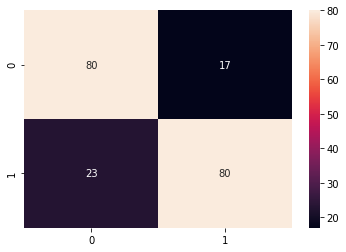

Metrics Results
- Accuracy: 81.38 %
- Precision: 83.27 %
- Recall: 78.35 %
- F1-score: 80.54 %




In [15]:
print('Logistic Regression Classification - Boosted')
print('\n')
print('Best Parameters')
print(grid1.best_params_)
print('Confusion Matrix')
cmb1 = confusion_matrix(y_test, boost_predictions1)
plt.plot()
sns.heatmap(cmb1, annot=True)
plt.show()
print('Metrics Results')
print("- Accuracy: {:.2f} %".format(grid1.cv_results_['mean_test_ACC'][grid1.best_index_].mean()*100))
print("- Precision: {:.2f} %".format(grid1.cv_results_['mean_test_PC'][grid1.best_index_].mean()*100))
print("- Recall: {:.2f} %".format(grid1.cv_results_['mean_test_REC'][grid1.best_index_].mean()*100))
print("- F1-score: {:.2f} %".format(grid1.cv_results_['mean_test_F1'][grid1.best_index_].mean()*100))
print('\n')

#### Support Vector Machine

Support Vector Machine - Boosted


Best Parameters
{'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Confusion Matrix


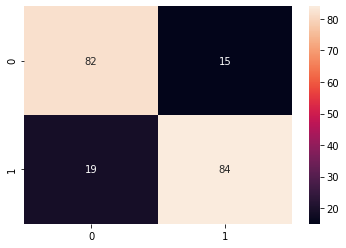

Metrics Results
- Accuracy: 81.50 %
- Precision: 61.09 %
- Recall: 52.30 %
- F1-score: 54.00 %




In [16]:
print('Support Vector Machine - Boosted')
print('\n')
print('Best Parameters')
print(grid2.best_params_)
print('Confusion Matrix')
cmb2 = confusion_matrix(y_test, boost_predictions2)
plt.plot()
sns.heatmap(cmb2, annot=True)
plt.show()
print('Metrics Results')
print("- Accuracy: {:.2f} %".format(grid2.cv_results_['mean_test_ACC'][grid2.best_index_].mean()*100))
print("- Precision: {:.2f} %".format(grid2.cv_results_['mean_test_PC'].mean()*100))
print("- Recall: {:.2f} %".format(grid2.cv_results_['mean_test_REC'].mean()*100))
print("- F1-score: {:.2f} %".format(grid2.cv_results_['mean_test_F1'].mean()*100))
print('\n')

#### Random Forest Boosted

Random Forest - Boosted


Best Parameters
{'criterion': 'entropy', 'n_estimators': 50}
Confusion Matrix


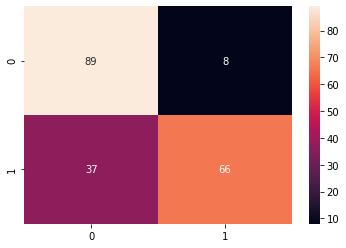

Metrics Results
- Accuracy: 80.875 %
- Precision: 86.880 %
- Recall: 73.077 %
- F1-score: 78.948 %




In [17]:
print('Random Forest - Boosted')
print('\n')
print('Best Parameters')
print(grid3.best_params_)
print('Confusion Matrix')
cmb3 = confusion_matrix(y_test, boost_predictions3)
plt.plot()
sns.heatmap(cmb3, annot=True)
plt.show()
print('Metrics Results')
print("- Accuracy: {:.3f} %".format(grid3.cv_results_['mean_test_ACC'][grid3.best_index_].mean()*100))
print("- Precision: {:.3f} %".format(grid3.cv_results_['mean_test_PC'][grid3.best_index_].mean()*100))
print("- Recall: {:.3f} %".format(grid3.cv_results_['mean_test_REC'][grid3.best_index_].mean()*100))
print("- F1-score: {:.3f} %".format(grid3.cv_results_['mean_test_F1'][grid3.best_index_].mean()*100))
print('\n')

## Predict a Single review Positive and Negative

Here we make a single prediction to a positive and a negative review.
We chose Logistic Regression Classifier because this model presents an accuracy score of $81.38 \%$ and precision of $83.27 \%$. The Support Vector Machine shows an accuracy big then the Logistic Regression, but the precision score of Support Vector Machine is not satisfactory.


In [18]:
# Positive case
new_review = 'I love this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = class_boost_1.predict(new_X_test)
if new_y_pred == 1:
  print('Positive Sentiment')
else:
  print('Negative Sentiment')

Positive Sentiment


In [19]:
# Negative case
new_review = 'I hate this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = class_boost_1.predict(new_X_test)
if new_y_pred == 1:
  print('Positive Sentiment')
else:
  print('Negative Sentiment')

Negative Sentiment


# Conclusion

In this notebook we have built a Bag of Words Model, with the aid of classification models we are able to make the sentiments analysis. The results are very satisfactory, our best model presents good accuracy and precision, being according with the problem reality.